  # NEXUS BANK PROJECT
  

- Nexus has conducted campaigns with the goal of acquiring deposits

- wants to understand how effective their campaigns are and thus develop marketing campaigns to reach specific customer segments

- The board specifically wants to anticipate future customer behavior and know the likelihood of subscription to term deposits from customers.

- They want to identify patterns and trends in customer behavior to decipher if customer demographics such as age, educational level e.t.c influences customers attitude toward defaulting.

- By analyzing customer behaviors, loan trends, and marketing campaign effectiveness

- By analyzing customer behaviors, loan trends, and marketing campaign effectiveness

### Project Expected Outcomes

- Understand the customer demographics
- Improve Campaign Efficiency
- identify Loan Defaulters
- Ultimately improve term Deposits (Term Deposits are a type of investment or savings product where individuals deposit a specific amount of money for a fixed period of time, known as the term or maturity period

### Steps Taken During the Project
![image](https://blog.camelot-group.com/wp-content/uploads/2019/03/Picture2.png)


In [1]:
# Import necessary libraries

# For Data Analysis
import pandas as pd
import numpy as np
from time import strptime

# For Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Machine Learning and Evaluation
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score, homogeneity_score

# Classifiers Libraries
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

#!pip install xgboost
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
#!pip install xgboost
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import KFold

from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report
# Evaluation Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix
sns.set()
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import skew, kurtosis

In [6]:
df = pd.read_csv(r"C:\Users\HENRY OKEOMA\Downloads\bank.csv")
df

age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day month  duration  campaign  pdays  previous poutcome  \
0        unknown    5   may       261         1     -1         0  unknown   
1        unknown    5   may       151         1     -1         0  unknown   
2        unknown    5   may        76         1     -1         0  unknown   
3        unknown    5   may        92         1     -1         0  unknown   
4        unknown    5   may       198         1     -1         0  unknown   
...          ...  ...   ...       ...       ...    ...       ...      ...   
45206   cellular   17   nov       977         3     -1         0  unknown   
45207   cellular   17   nov       456         2     -1         0  unknown   
45208   cellular   17   nov      1127         5    184         3  success   
45209  telephone   17   nov       508         4     -1         0  unknown   
45210   cellular   17   nov       361         2    188        11    other   

      deposit  
0          no  
1          no  
2          no  
3          no  
4          no  
...       ...  
45206     yes  
45207     yes  
45208     yes  
45209      no  
45210      no  

[45211 rows x 17 columns]

In [9]:
# Some figures in the pdays are negative, so we have to change them to positive
df['pdays'] = abs(df['pdays'])
df.head(3)

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   

   contact  day month  duration  campaign  pdays  previous poutcome deposit  
0  unknown    5   may       261         1      1         0  unknown      no  
1  unknown    5   may       151         1      1         0  unknown      no  
2  unknown    5   may        76         1      1         0  unknown      no

In [10]:
# Dimensionality
df.shape

(45211, 17)

In [6]:
# Get DataFrame information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  deposit    45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


#### Our data seems to be complete in all the columns, 45211 entries across all columns are complete

In [11]:
# Check the Statistical description of the Numerical Data
df.describe()

age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      41.832563      0.580323  
std       99.456849      2.303441  
min        1.000000      0.000000  
25%        1.000000      0.000000  
50%        1.000000      0.000000  
75%        1.000000      0.000000  
max      871.000000    275.000000

In [12]:
# Checking for Duplicates
df.duplicated().sum()

0

In [9]:
# Checking if we have no missing figures, althogh we dont have as seen in the info as above
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

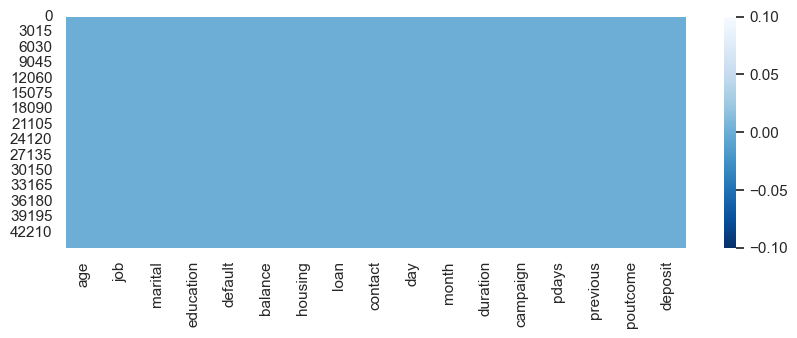

In [13]:
# Visualise the missing Data although none
plt.figure(figsize=(10,3))
sns.heatmap(df.isnull(), cbar=True, cmap='Blues_r');

#### We have no missing data and we shall go straight to Exploratory Data Analysis, but we have to create few new features

In [14]:
#Create a New Column for Month Name in Numerical format i.e. month number creation
df['month_number'] = [strptime(str(x), '%b').tm_mon for x in df['month']]

In [15]:
# Creating Age Bracket for the Customers
# Age Brackets

def age_bracket(age):
    if age <= 35:
        return 'Youth(<35)'
    elif age <= 55:
        return 'Adult(<=55)'
    elif age <= 65:
        return 'Old Adult(<=65)'
    else:
        return 'Elderly (>65)'

df['age_bracket'] = df['age'].apply(age_bracket)

## Univariate Analysis of Numerical Columns

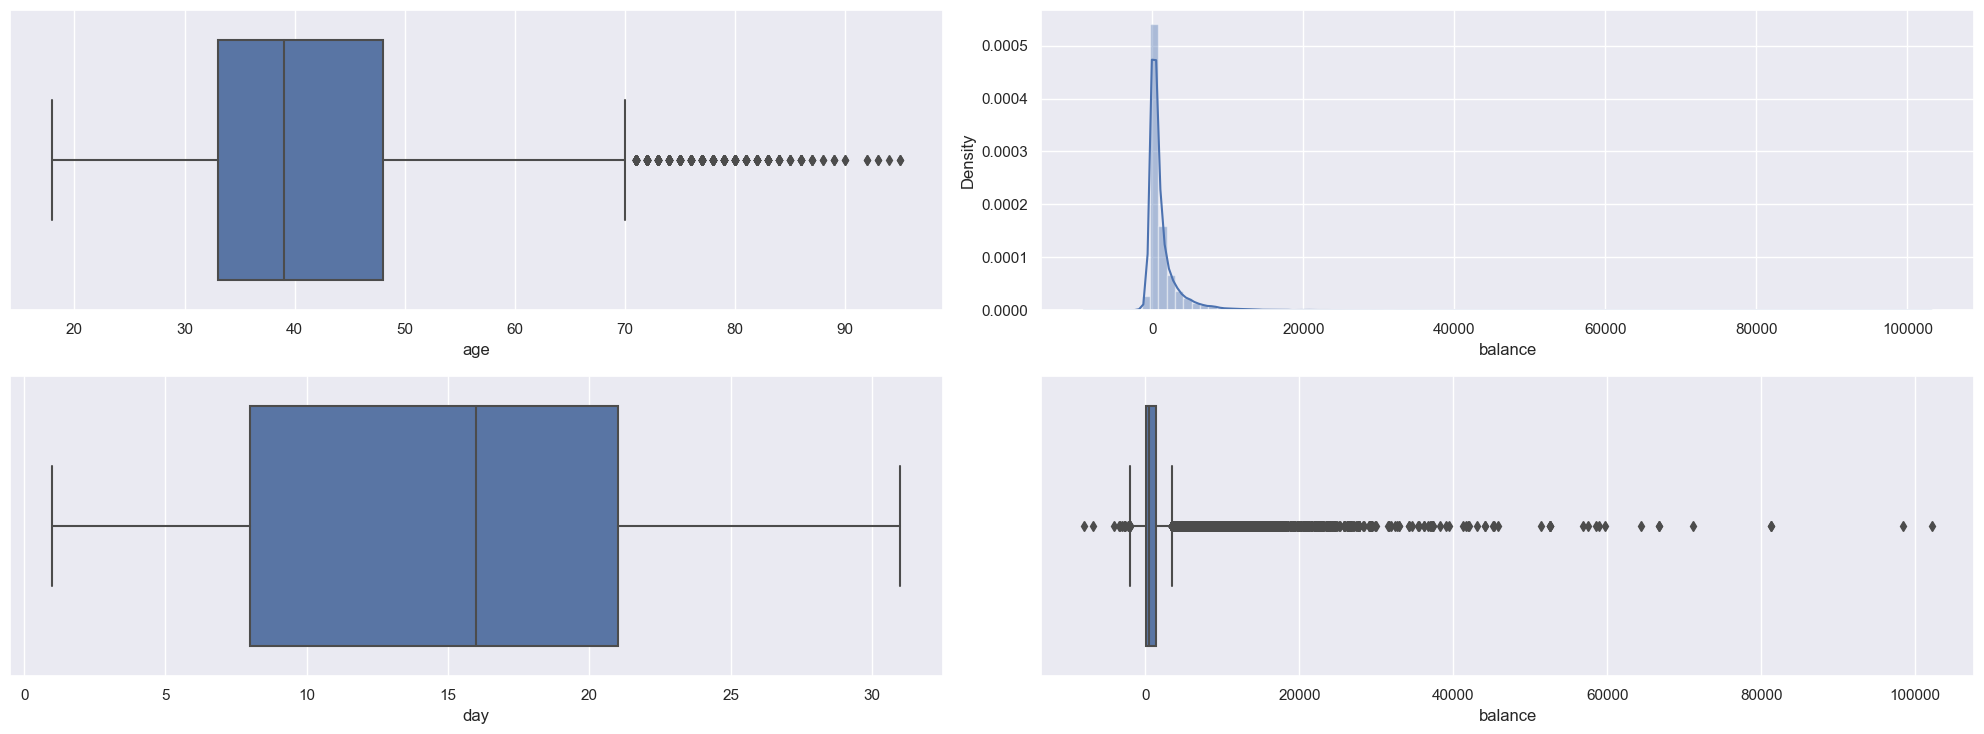

In [13]:
# We shall use the boxplot to visisualise all the numerical columns. This will enable us to point areas 
# we may find useful insights
fig, axs = plt.subplots(2,2, figsize = (20,7.5))
plt1 = sns.boxplot(df['age'], ax = axs[0,0])
plt1 = sns.distplot(df['balance'], bins=100, ax = axs[0,1])
plt1 = sns.boxplot(df['day'], ax = axs[1,0])
plt1 = sns.boxplot(df['balance'], ax = axs[1,1])

plt.tight_layout()

In [14]:
#Skewness and Kurtosis
print("skewness: %f" % df["balance"].skew())
print("Kurtosis: %f" % df["balance"].kurt())

skewness: 8.360308
Kurtosis: 140.751547


#### Most of the customers are within ages 32 to about 49years

#### Day of the month when the customer was last contacted is usually between day 8 - 22, which second and third week 

#### The account balance most customers have in their account are mostly less than 10,000 , with several outliers (few negative balances), only 2 customer are close to 100k balance

#### We can also see the Kurtosis and skewness for the balance as palykurtic and the positively skewed.

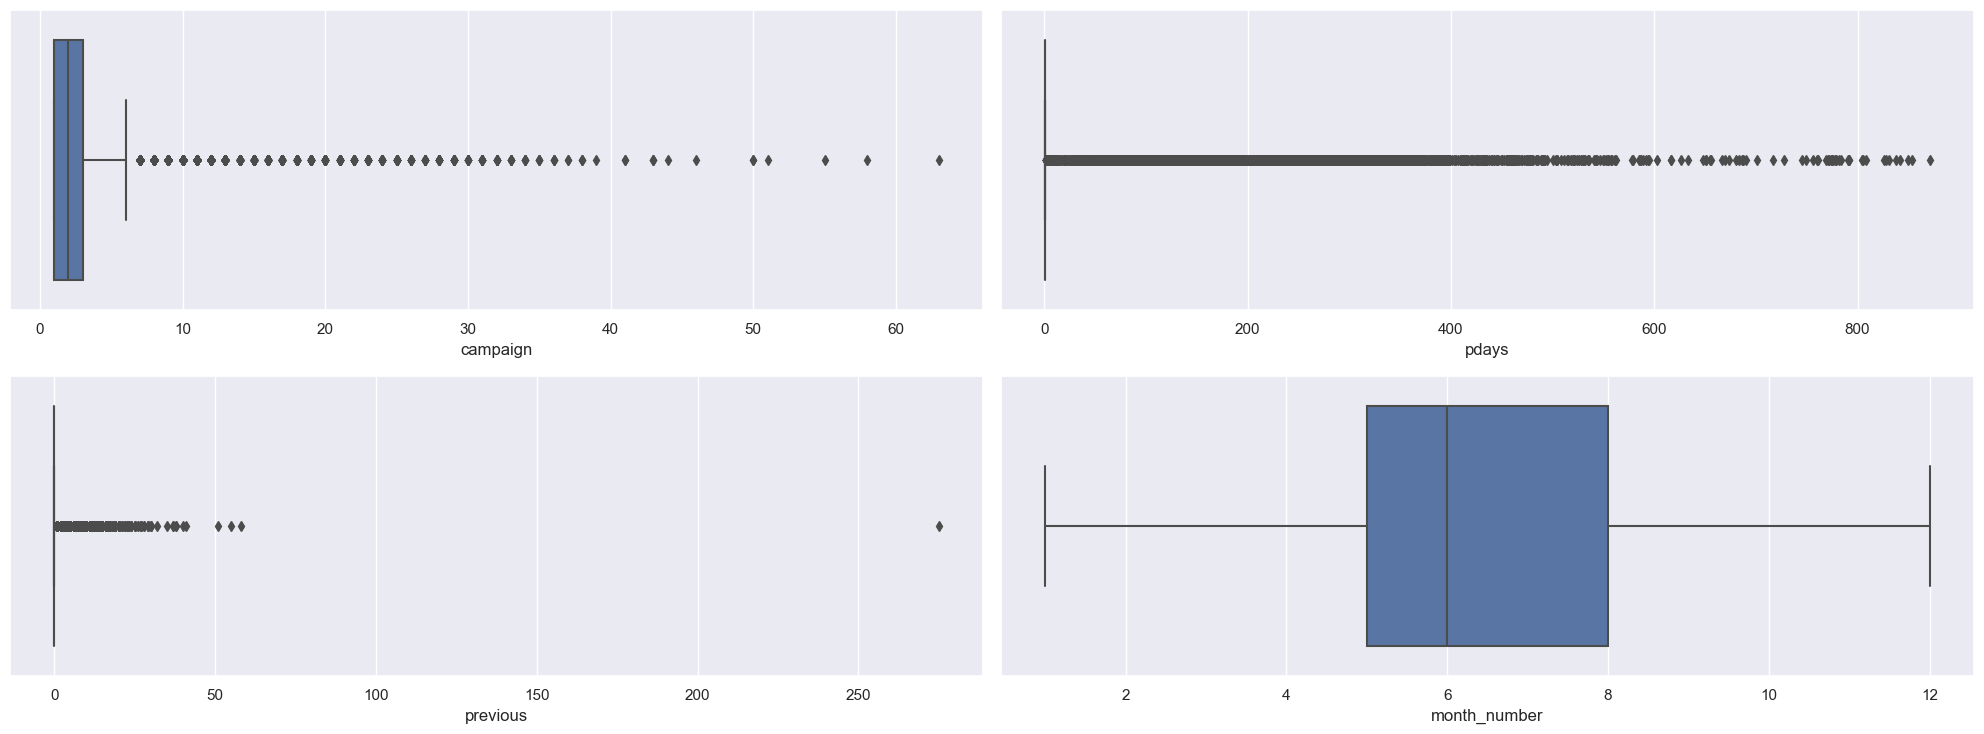

In [15]:
# Numerical columns contd
fig, axs = plt.subplots(2,2, figsize = (20,7.5))
plt1 = sns.boxplot(df['campaign'], ax = axs[0,0])
plt1 = sns.boxplot(df['pdays'], ax = axs[0,1])
plt1 = sns.boxplot(df['previous'], ax = axs[1,0])
plt1 = sns.boxplot(df['month_number'], ax = axs[1,1])


plt.tight_layout()

#### Months 5 - 8 are the most busy periods; which is between may and august

## Univariate Analysis of Categorical Columns

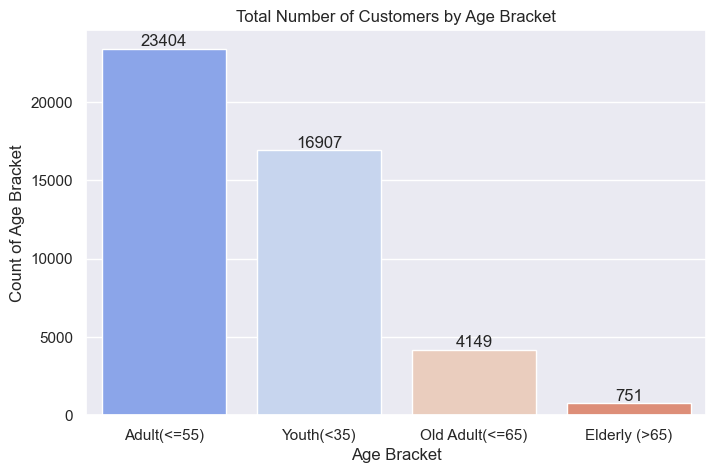

In [16]:
# Counting the age group of customers
plt.figure(figsize=(8,5))
ax = sns.countplot(x='age_bracket', data=df, order=df['age_bracket'].value_counts().index, palette='coolwarm')
values = df['age_bracket'].value_counts().values
ax.bar_label(container = ax.containers[0], labels=values)
plt.title('Total Number of Customers by Age Bracket')
plt.xlabel('Age Bracket')
plt.ylabel('Count of Age Bracket');

### Most of the customers are between 35 - 55 years adults, followed by youths of less than 35years. old adults and elderly are minor

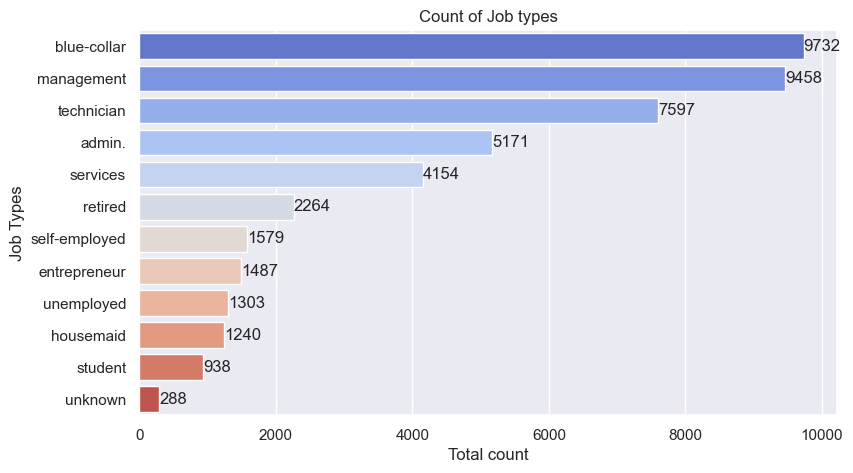

In [17]:
# Count the Job types in our data set to see the most predominant

plt.figure(figsize=(9,5))
ax = sns.countplot(y='job', data=df, order=df['job'].value_counts().index, palette='coolwarm')
values = df['job'].value_counts().values
ax.bar_label(container = ax.containers[0], labels=values)
plt.title('Count of Job types')
plt.xlabel('Total count')
plt.ylabel('Job Types');

### Blue-collar, management and technicians are topping the list while housemaid, student and unknown are the bottom three for Job types

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

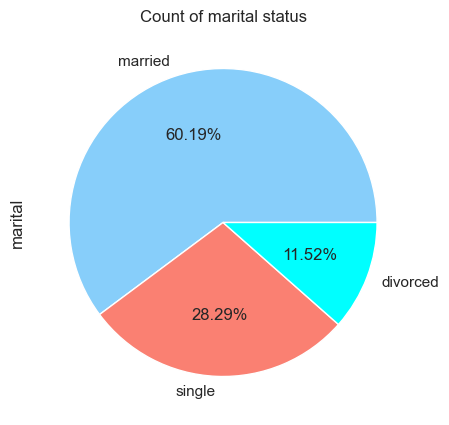

In [18]:
# Count of Customer Marital Status
plt.figure(figsize =(10,5))
df['marital'].value_counts(normalize=True).plot.pie(autopct="%1.2f%%", colors = ['lightskyblue', 'salmon', 'cyan'])
plt.title("Count of marital status")
df['marital'].value_counts()

### We have a good number of Nexus bank customer as married people, followed by single. Divorced customers are quite few

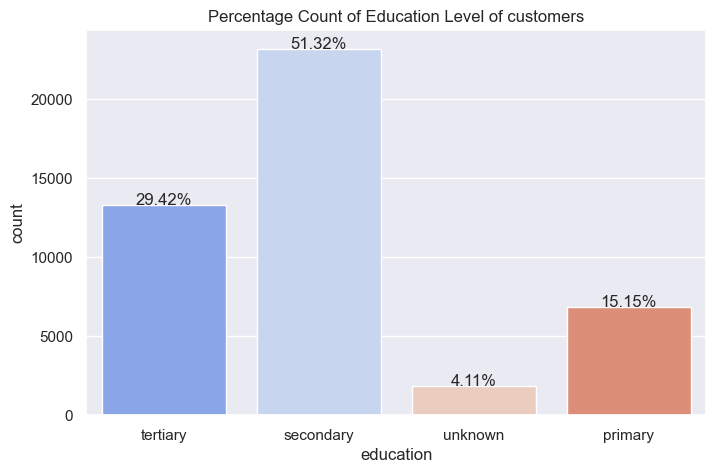

In [19]:
# Investigating the Education level of the customers
plt.figure(figsize=(8,5))
ax = sns.countplot(x='education', data=df, palette='coolwarm')
plt.title('Percentage Count of Education Level of customers')

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.1, '{:.2f}%'.format(height / len(df) * 100), ha="center")

plt.show()

### Insight: The secondary and tertiary is the highest education attained by most customers

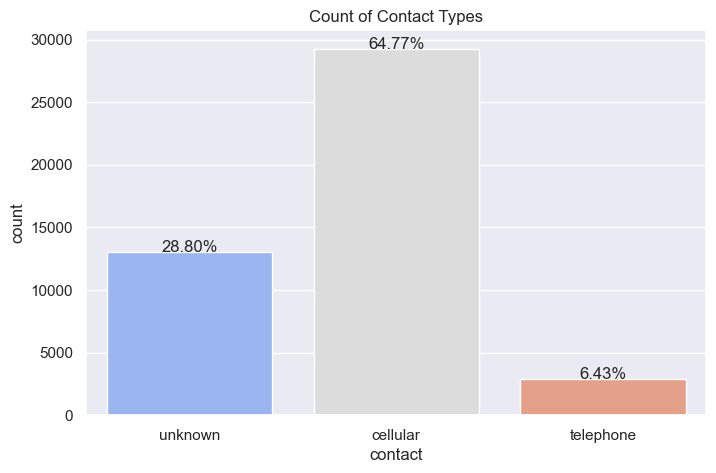

In [20]:
# Investigating the Contact types used to reach the customers
plt.figure(figsize=(8,5))
ax = sns.countplot(x='contact', data=df, palette='coolwarm')
plt.title('Count of Contact Types')

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.1, '{:.2f}%'.format(height / len(df) * 100), ha="center")

plt.show()

### Cellular contacts is the most used methods used to reach the customers, unknown contact is not clearly defined, is this email? or letters posted?

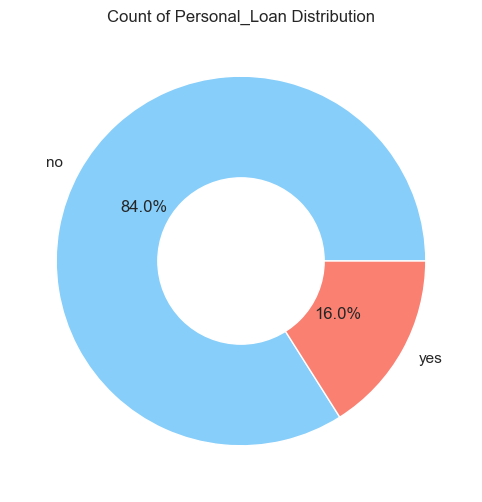

no     37967
yes     7244
Name: loan, dtype: int64

In [21]:
# We shall check the distribution of personal loan
loan_counts = df['loan'].value_counts()
plt.figure(figsize=(8,6))
plt.pie(loan_counts, labels=loan_counts.index, autopct='%1.1f%%', colors= ['lightskyblue', 'salmon'])

# draw circle
centre_circle = plt.Circle((0, 0), 0.45, fc='white')
fig = plt.gcf() 
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)
# Adding Title of chart
plt.title('Count of Personal_Loan Distribution'); 
# Displaying Chart
plt.show()
df['loan'].value_counts()

### Insight: There are fewer customers on personal loan on our data

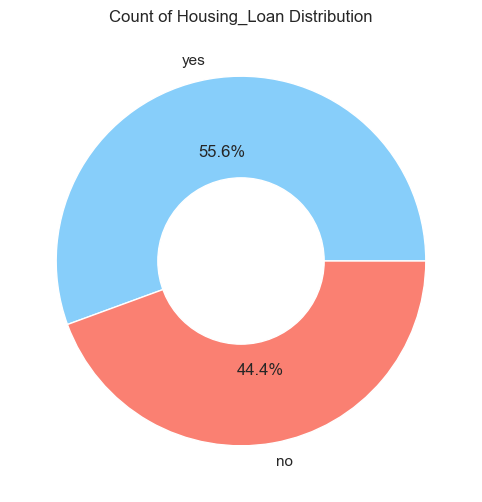

yes    25130
no     20081
Name: housing, dtype: int64

In [22]:
# We shall check the distribution of housing loan
housing_counts = df['housing'].value_counts()
plt.figure(figsize=(8,6))
plt.pie(housing_counts, labels=housing_counts.index, autopct='%1.1f%%', colors= ['lightskyblue', 'salmon'])

# draw circle
centre_circle = plt.Circle((0, 0), 0.45, fc='white')
fig = plt.gcf() 
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)
# Adding Title of chart
plt.title('Count of Housing_Loan Distribution'); 
# Displaying Chart
plt.show()
df['housing'].value_counts()

### There are more customers with housing loan in our data

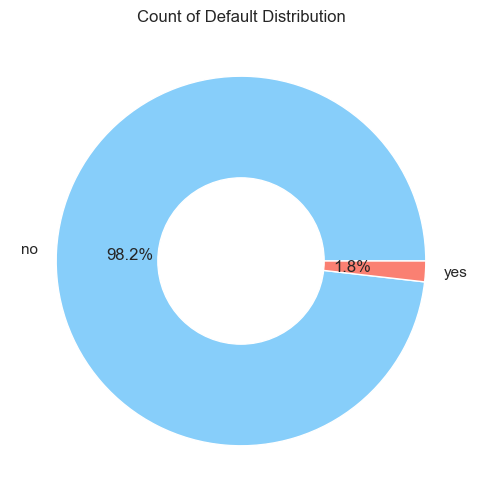

no     44396
yes      815
Name: default, dtype: int64

In [23]:
# We shall check the distribution of defaulters in the bank data
default_counts = df['default'].value_counts()
plt.figure(figsize=(8,6))
plt.pie(default_counts, labels=default_counts.index, autopct='%1.1f%%', colors= ['lightskyblue', 'salmon'])

# draw circle
centre_circle = plt.Circle((0, 0), 0.45, fc='white')
fig = plt.gcf() 
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)
# Adding Title of chart
plt.title('Count of Default Distribution'); 
# Displaying Chart
plt.show()
df['default'].value_counts()

### Only 1.8% of all customers have previously defaulted, hence we can say default is not a serious issue in the bank. More than 98% have not defaulted, which is a good number

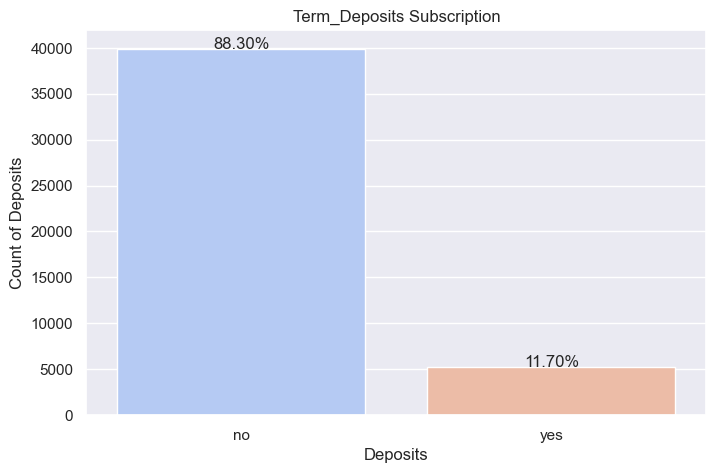

In [24]:
# Investigating the Term Deposit by customer
plt.figure(figsize=(8,5))
ax = sns.countplot(x='deposit', data=df, palette='coolwarm')
plt.title('Term_Deposits Subscription')
plt.xlabel('Deposits')
plt.ylabel('Count of Deposits')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.1, '{:.2f}%'.format(height / len(df) * 100), ha="center")

plt.show();

### Term deposit subscription is very low in the bank. We have this number at 11.7%. Most of bank customers are not going for this services

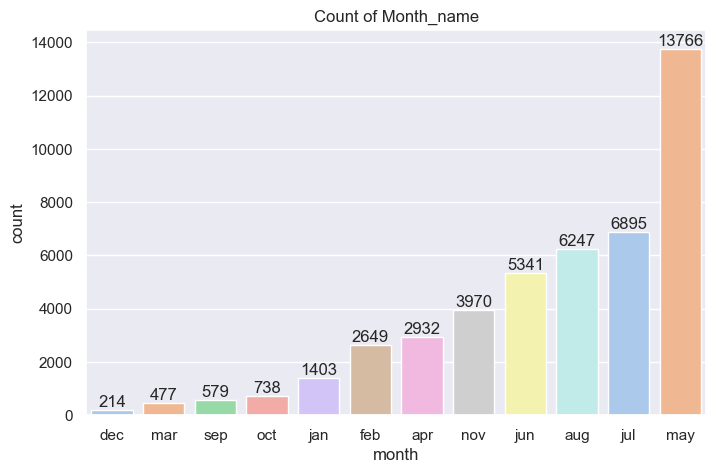

In [25]:
# We shall also check the specific month with highest activity, we know this is within may -august
plt.figure(figsize=(8,5))
ax = sns.countplot(x=df["month"], order = df["month"].value_counts(ascending=True).index, palette='pastel')
values = df["month"].value_counts(ascending=True).values
ax.bar_label(container = ax.containers[0], labels=values)
plt.title("Count of Month_name");

### We have most of the activities in may, then July and August. Least is December and March

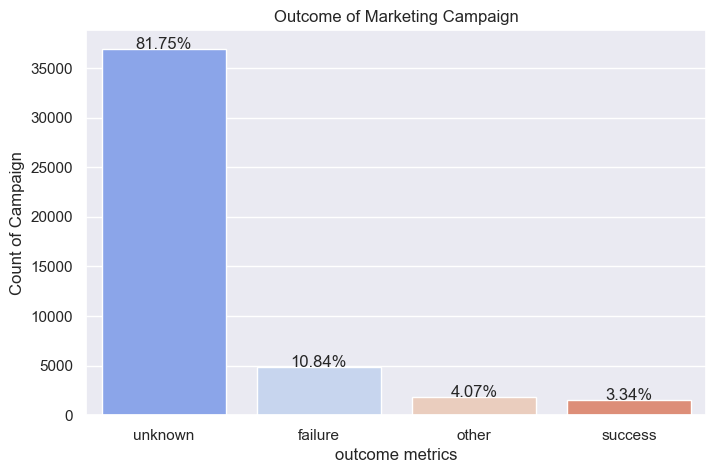

In [26]:
# Investigating the outcome of campaign
plt.figure(figsize=(8,5))
ax = sns.countplot(x='poutcome', data=df, palette='coolwarm')
plt.title('Outcome of Marketing Campaign')
plt.xlabel('outcome metrics')
plt.ylabel('Count of Campaign')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.1, '{:.2f}%'.format(height / len(df) * 100), ha="center")

plt.show();

### A good number of campaigns outcomes have not been measured as 'Unknown',  however, for the measured ones, the failure rate is higher than the success rate

## Bivariate Analysis and Multivariate Analysis
- With focus on Term Deposits (as Deposits)
- With Focus on Loan Defaulting
- With Focus on Campaigns contacts and Previous contacts and its relationship to Deposits

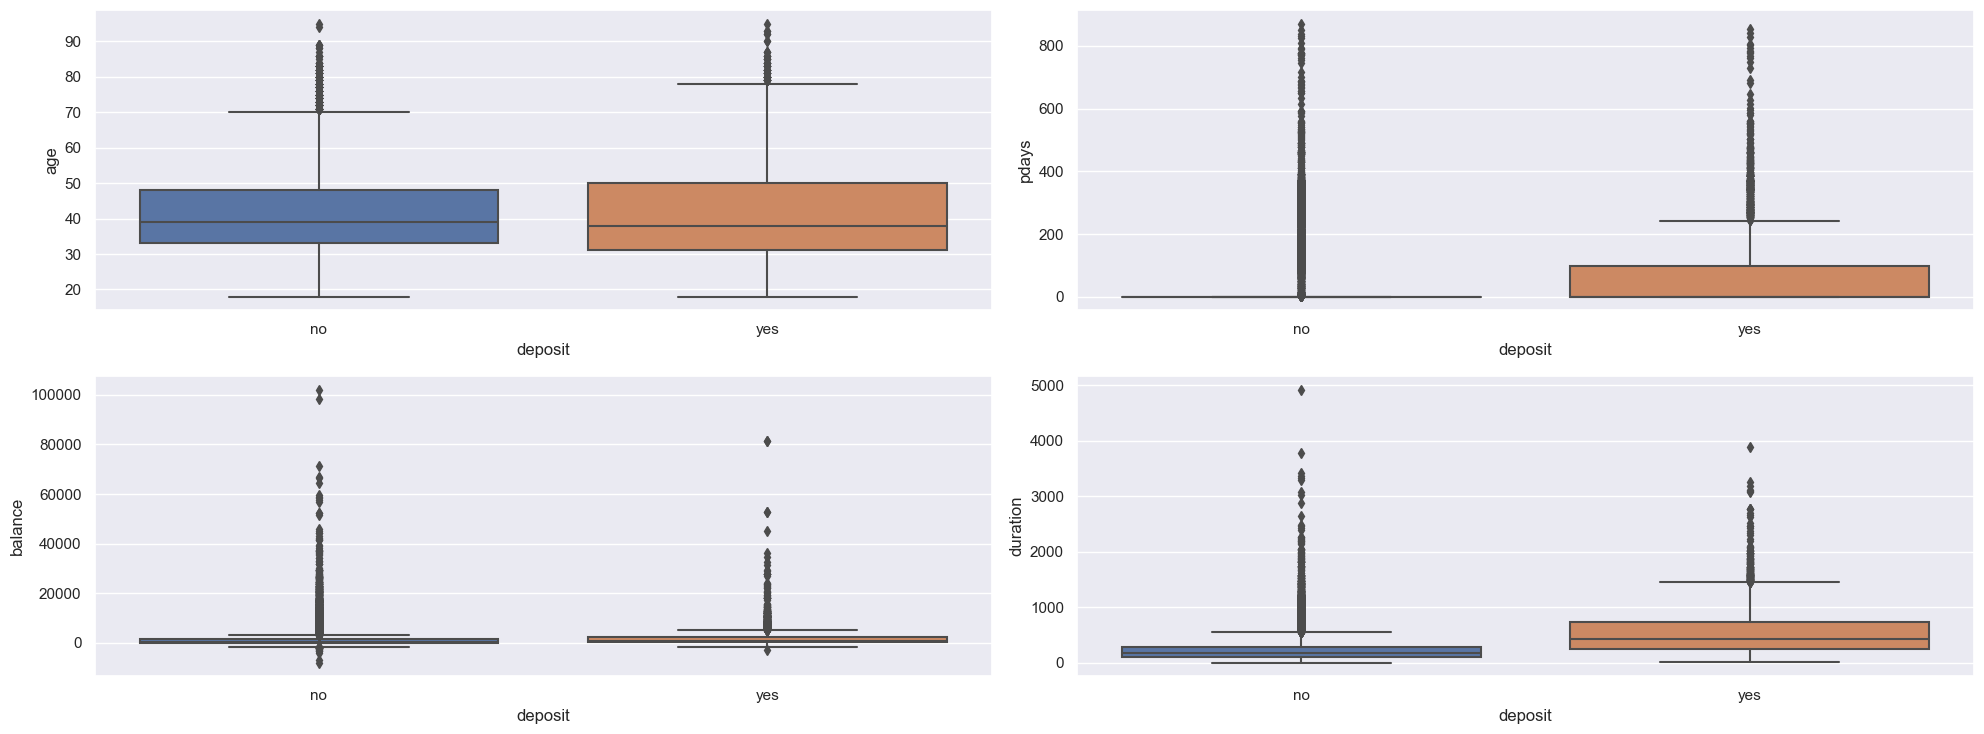

In [27]:
# We shall use the boxplot to visisualise on some selected numerical columns. This will enable us to point areas 
# we may find useful insights on the Target deposits
fig, axs = plt.subplots(2,2, figsize = (20,7.5))
plt1 = sns.boxplot(y = df['age'], x= df['deposit'], data=df, ax = axs[0,0])
plt1 = sns.boxplot(y= df['pdays'], x=df['deposit'], data=df, ax = axs[0,1])
plt1 = sns.boxplot(y = df['balance'], x= df['deposit'], data=df, ax = axs[1,0])
plt1 = sns.boxplot(y = df['duration'], x= df['deposit'], data=df, ax = axs[1,1])

plt.tight_layout()

### Commenting on some selected columns, the more duration the call is, the more likelihood for the customer to say yes to deposit, and also more yes as the customers age. We also saw  slight influence on the pdays with respect to 'yes' to deposits.

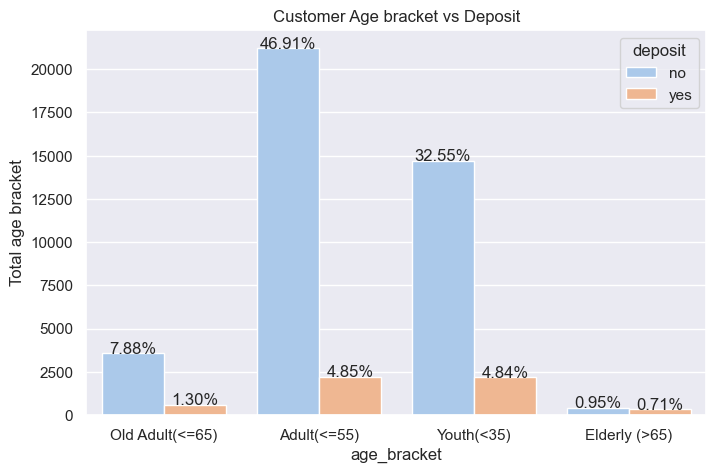

In [28]:
# We shall check the customer type with deposits.
plt.figure(figsize=(8,5))
ax = sns.countplot(x='age_bracket', data=df, hue='deposit', palette='pastel')
plt.title('Customer Age bracket vs Deposit')
plt.xlabel('age_bracket')
plt.ylabel('Total age bracket')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.1, '{:.2f}%'.format(height / len(df) * 100), ha="center")

plt.show();

### Here we have the old adults and elderly are most interested in deposits

###  The adults  and the Youths (0 - 55yrs)  customer make up a high  number of customers, but on the contrary, the contribute least proportion wise to the deposits, hence these are the people marketting campaigns shold be targeted towards.  



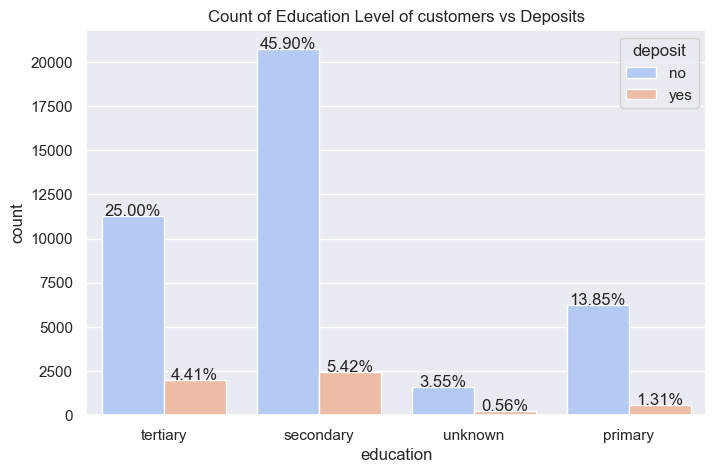

In [29]:
# Investigating the Education level of the customers and deposits
plt.figure(figsize=(8,5))
ax = sns.countplot(x='education', data=df, hue='deposit', palette='coolwarm')
plt.title('Count of Education Level of customers vs Deposits')

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.1, '{:.2f}%'.format(height / len(df) * 100), ha="center")

plt.show()

### Tertiary and unknown group have the most loan by proportion. 

### Customers with education level as secondary and primary have the lowest deposits and should be a target for marketing campaign to improve their term deposits.

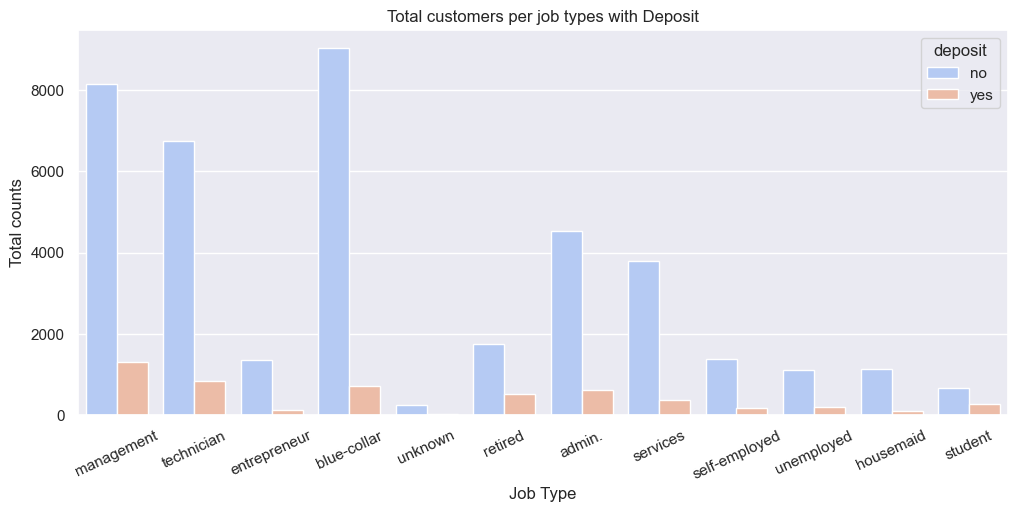

In [30]:
# Counting the Job Types with Most loans

plt.figure(figsize=(12,5))
ax = sns.countplot(x='job', hue='deposit', data=df, palette='coolwarm')
plt.title('Total customers per job types with Deposit')
plt.xlabel('Job Type')
plt.ylabel('Total counts')
plt.xticks(rotation=25)

plt.show();

### Student & retired Job-type have most deposits by proportion. 

### Blue-collar, Entreprenuer and services have the least deposit by their total counts and should also included in the target for campaigh.

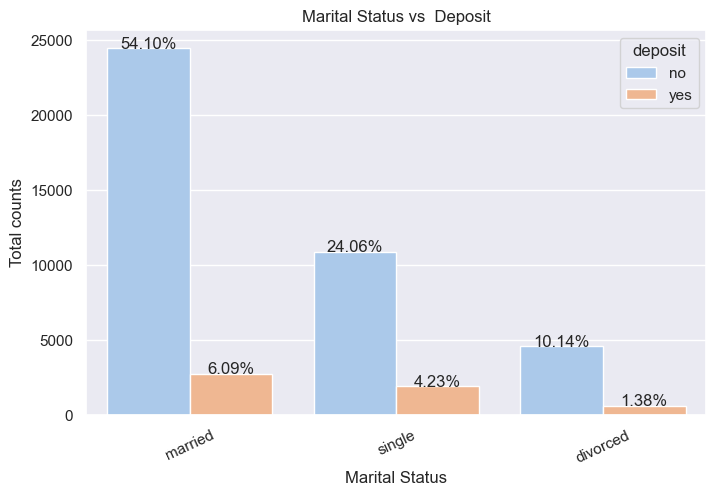

In [31]:
# Counting the Job Types with Most loans

plt.figure(figsize=(8,5))
ax = sns.countplot(x='marital', hue='deposit', data=df, palette='pastel')
plt.title('Marital Status vs  Deposit')
plt.xlabel('Marital Status')
plt.ylabel('Total counts')
plt.xticks(rotation=25)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.1, '{:.2f}%'.format(height / len(df) * 100), ha="center")

plt.show();

### Single customers have the most loans by proportion, however, married customers have the least deposits compared to their total count and they should also be target for campaigns

### INVESTIGATING IF THE BALANCE IN THE CUSTOMERS BANK ACCOUNT IS INFLUENCING DEPOSITS

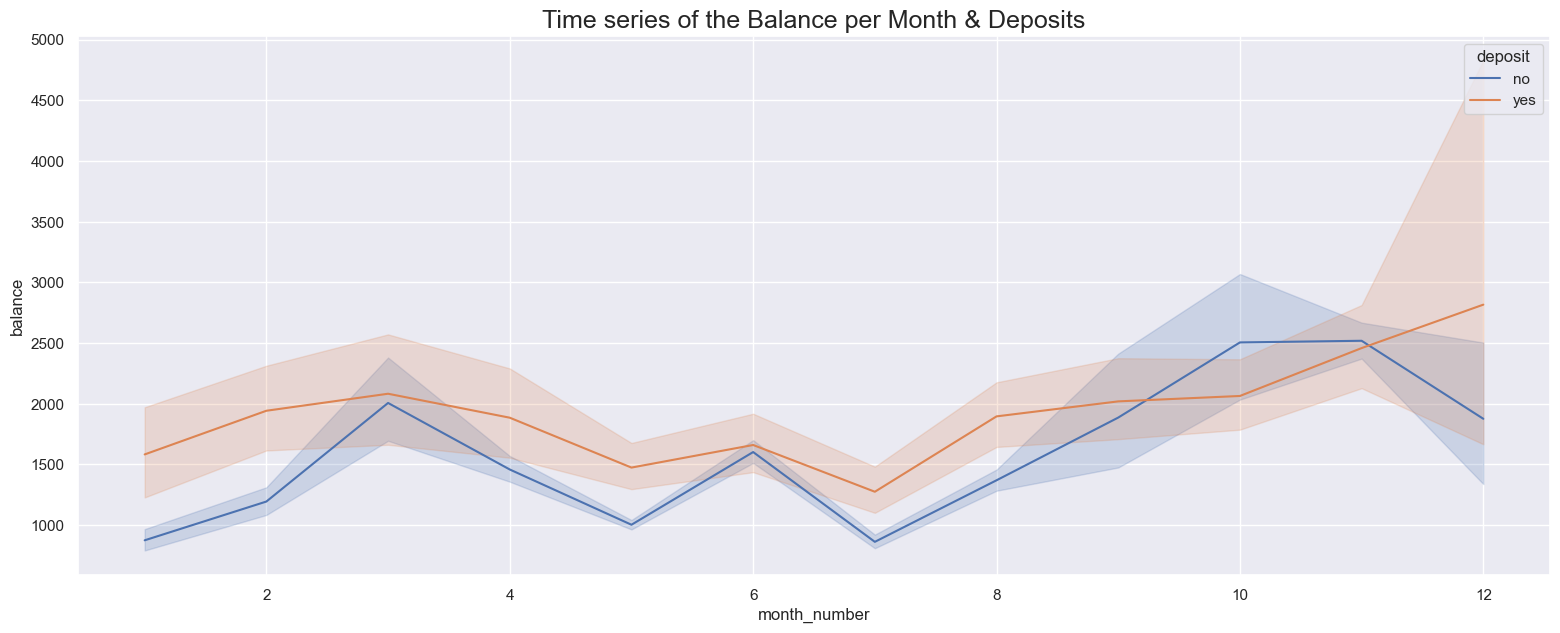

In [32]:
# Checking the time series of balance per month and its relationship with deposits.
plt.figure(figsize=(19,7))
plt.title('Time series of the Balance per Month & Deposits', fontsize=18)
sns.lineplot(x='month_number', y='balance', hue='deposit', data=df );

### Overall on each month, there are more customers saying 'Yes' than 'No' to term deposits, but still insignificant because of low bank balances across.

- Further Checks were made on each of the Categories eg.  in relation to Bank Balances

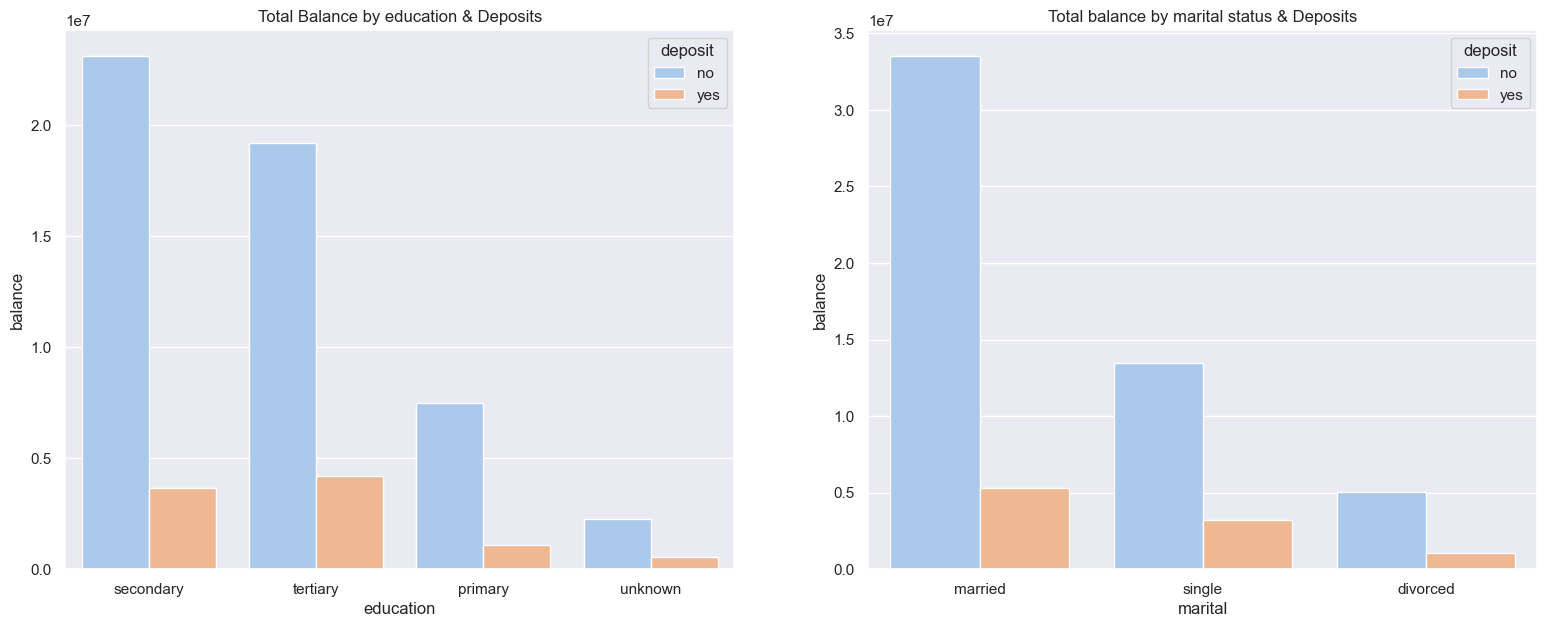

In [33]:
# We shall Visualise together the Education & Marital Status with highest Total Balance & Deposit
plt.figure(figsize=(19,7))

plt.subplot(1,2,1)
Edub = df.groupby(['education','deposit'])['balance'].sum().sort_values(ascending=False).reset_index()
ax = sns.barplot(x='education', data=Edub, y='balance', hue='deposit', palette='pastel')
plt.title('Total Balance by education & Deposits')


plt.subplot(1,2,2)
MarB = df.groupby(['marital','deposit'])['balance'].sum().sort_values(ascending=False).reset_index()
ax = sns.barplot(y='balance', data=MarB, x='marital',hue='deposit', palette='pastel')
plt.title('Total balance by marital status & Deposits');


### Customers with tertiary education have the highest deposit and by marital status, customers who are single have the higher percentage of deposits by proportion. This is similar as obtained above

- This Checks on the Different Categorical Features in relation to the Bank balance with respect to Deposits were done for Job-type, but the results were the same as previously seen with count of Job Type vs DDeposit, hence the visuals was excluded

### INVESTIGATING HOW THE PREVIOUS CONTACTS AND THE CURRENT CAMPAIGN IS INFLUENCING DEPOSITS ON THE CUSTOMERS

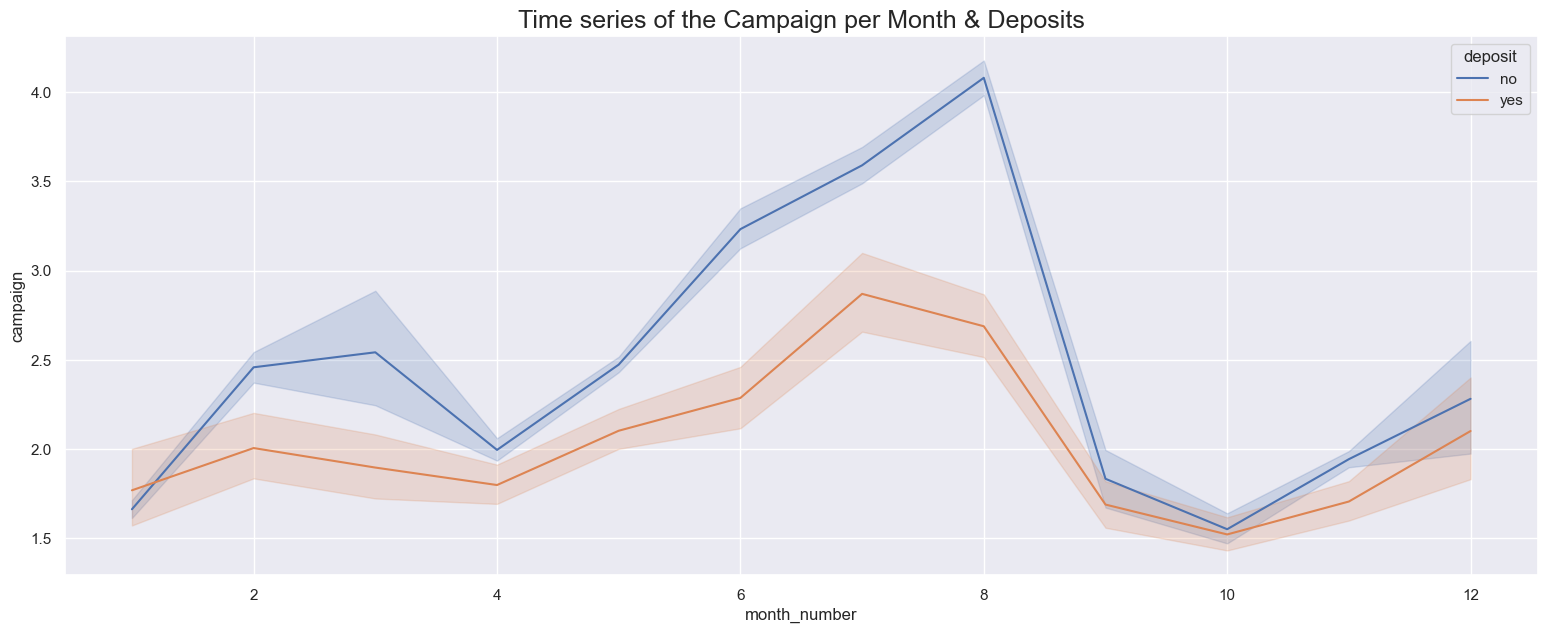

In [34]:
# line plot of Current Campaign per month with Deposits
plt.figure(figsize=(19,7))
plt.title('Time series of the Campaign per Month & Deposits', fontsize=18)
sns.lineplot(x='month_number', y='campaign',hue='deposit', data=df );

### The Campaign are returning deposits but not as planned/expected by the bank, the deposits are still low, and as campaign contacts increased from  april till august in the line plot, deposits also experienced an increase in that period with both falling around september  before subsequent increase. 

### The peak of  most deposits were done in commencing from may, then June, July and august before declining.

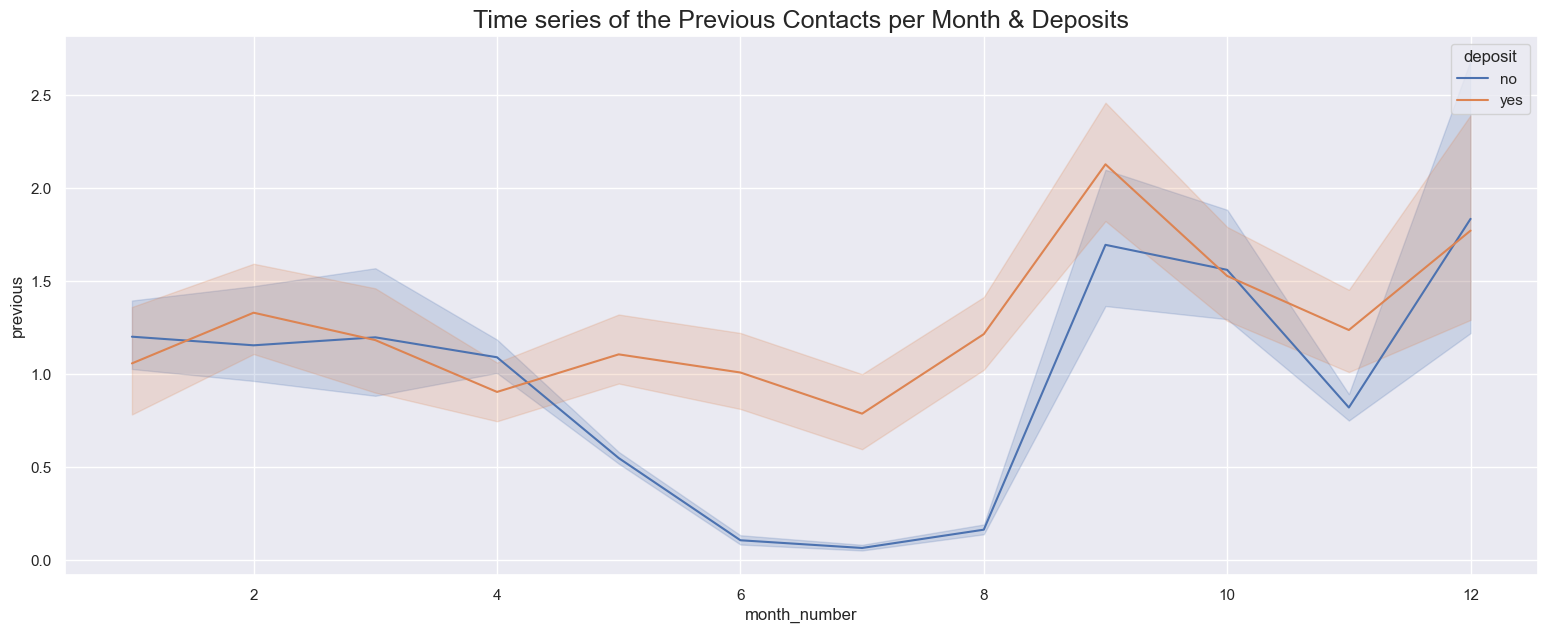

In [35]:
# line plot of Previous contact after last Campaign per month with Deposits
plt.figure(figsize=(19,7))
plt.title('Time series of the Previous Contacts per Month & Deposits', fontsize=18)
sns.lineplot(x='month_number', y='previous',hue='deposit', data=df );

### The previous contacts made to the customer before this campaign had more 'Yes' than 'No', with high numbers from August, september, October & December

### Digging Deeper, to check How the Contacts are Made between the previous Contacts and Current Campaign and also the messure the succes of both previous contacts and campaign

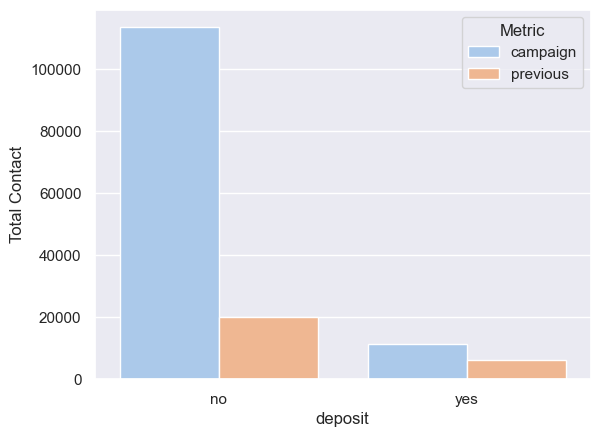

In [36]:
xyz = df.groupby(['deposit'])[['campaign', 'previous']].sum().reset_index()
xyzz = pd.melt(xyz, id_vars='deposit', var_name='Metric', value_name='Total Contact')
sns.barplot(x='deposit', y='Total Contact',ci=None, hue='Metric', palette='pastel', data=xyzz);

### Increased number of contacts to customer in the campaign have not returned a signifcant 'Yes' to term deposits in comparison with the previous number of contacts made to customer, it is not clear why the campaign performance is this way.

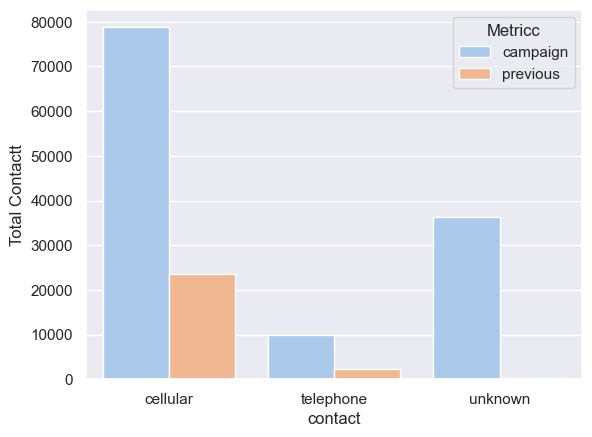

In [37]:
# What are the method of contacts used previously and in this campaign? we shall see below;
zxy = df.groupby(['contact'])[['campaign', 'previous']].sum().reset_index()
zxyy = pd.melt(zxy, id_vars='contact', var_name='Metricc', value_name='Total Contactt')
sns.barplot(x='contact', y='Total Contactt',ci=None, hue='Metricc', palette='pastel', data=zxyy);

### Unknown contact is not well defined and only present in the campaign (at a good number) and absent in the previous contacts as shown above.

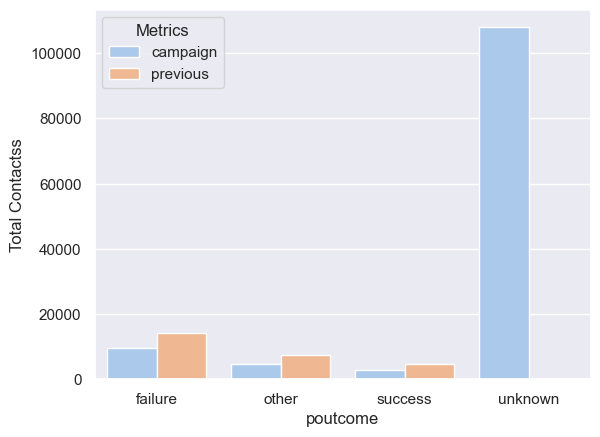

In [38]:
# Finally concluding on the previous contacts and the current campaign, 
ccc = df.groupby(['poutcome'])[['campaign', 'previous']].sum().reset_index()
cccy = pd.melt(ccc, id_vars='poutcome', var_name='Metrics', value_name='Total Contactss')
sns.barplot(x='poutcome', y='Total Contactss',ci=None, hue='Metrics', palette='pastel', data=cccy);

### Measuring the previous contacts and campaign outcomes, we can deduce that previous contacts have more success. Also have more flailure. But the failure learnings were not investigated and thus embarking on further campaign which have not returned anymore success but only reduced failure.

### Further, the unknown outcome is not well defined.

### Checking the above on the Categorical Features as below

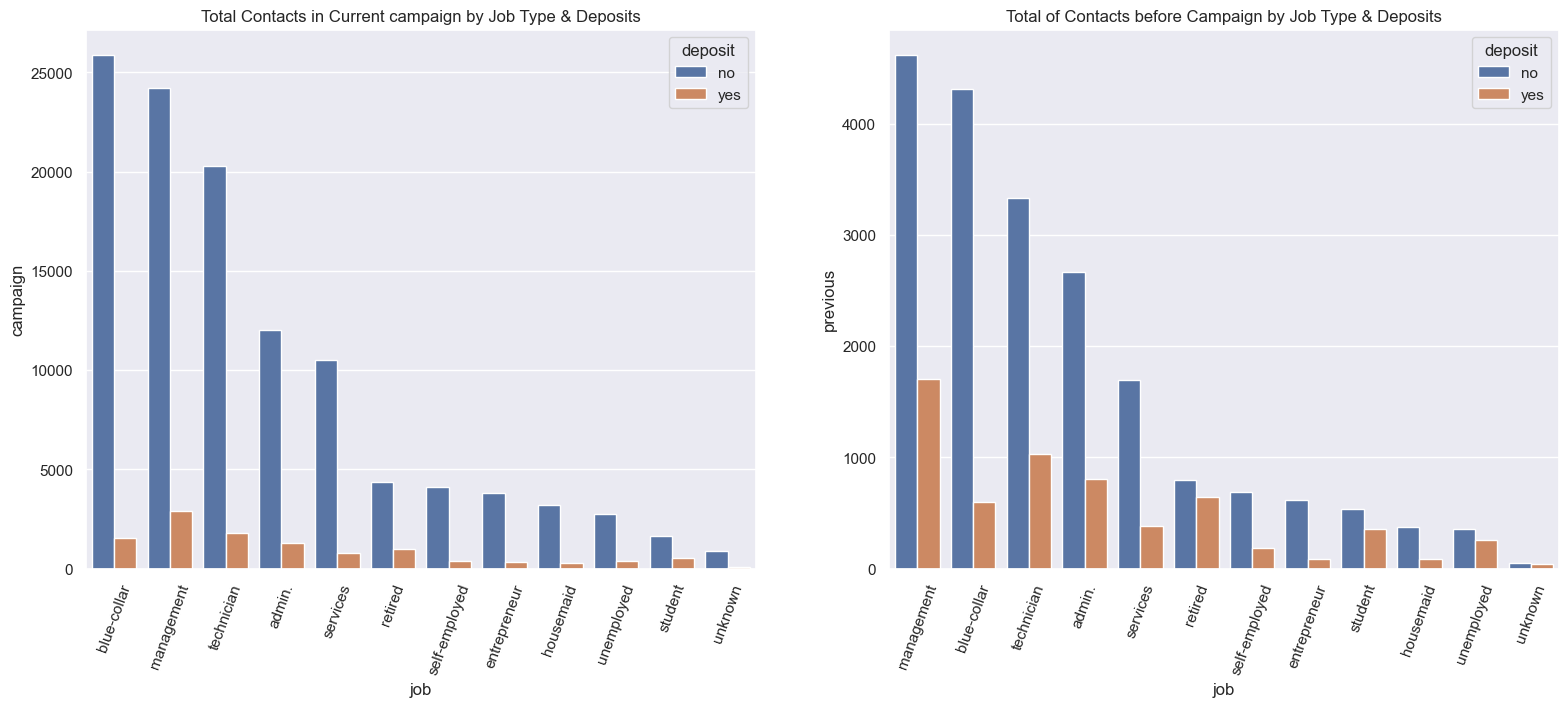

In [39]:
# We shall group the Job  and deposits against the Campaign
plt.figure(figsize=(19,7))

plt.subplot(1,2,1)
jobC = df.groupby(['job','deposit'])['campaign'].sum().sort_values(ascending=False).reset_index()
sns.barplot(x='job', data=jobC, y='campaign', hue='deposit')
plt.title('Total Contacts in Current campaign by Job Type & Deposits')
plt.xticks(rotation=70);

plt.subplot(1,2,2)
jobP = df.groupby(['job','deposit'])['previous'].sum().sort_values(ascending=False).reset_index()
sns.barplot(x='job', data=jobP, y='previous', hue='deposit')
plt.title('Total of Contacts before Campaign by Job Type & Deposits')
plt.xticks(rotation=70);

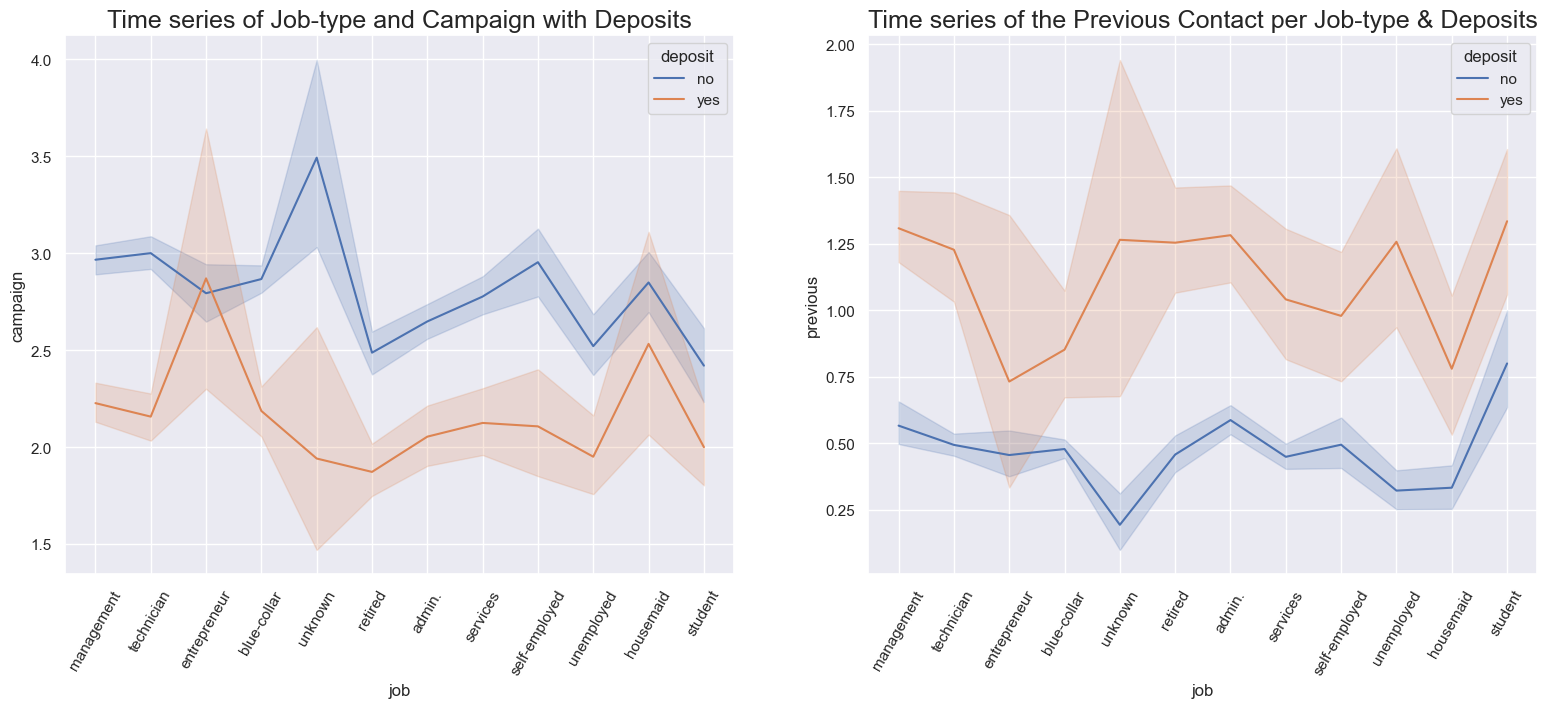

In [40]:
# Also using a lineplot to compare the above
plt.figure(figsize=(19,7))

plt.subplot(1,2,1)
plt.title('Time series of Job-type and Campaign with Deposits', fontsize=18)
sns.lineplot(x='job', y='campaign', hue='deposit', data=df )
plt.xticks(rotation=60)

plt.subplot(1,2,2)
plt.title('Time series of the Previous Contact per Job-type & Deposits', fontsize=18)
sns.lineplot(x='job', y='previous',hue='deposit', data=df )
plt.xticks(rotation=60);

### We can see more 'No' above in the campaign and More 'Yes' in the previous by Job-Type

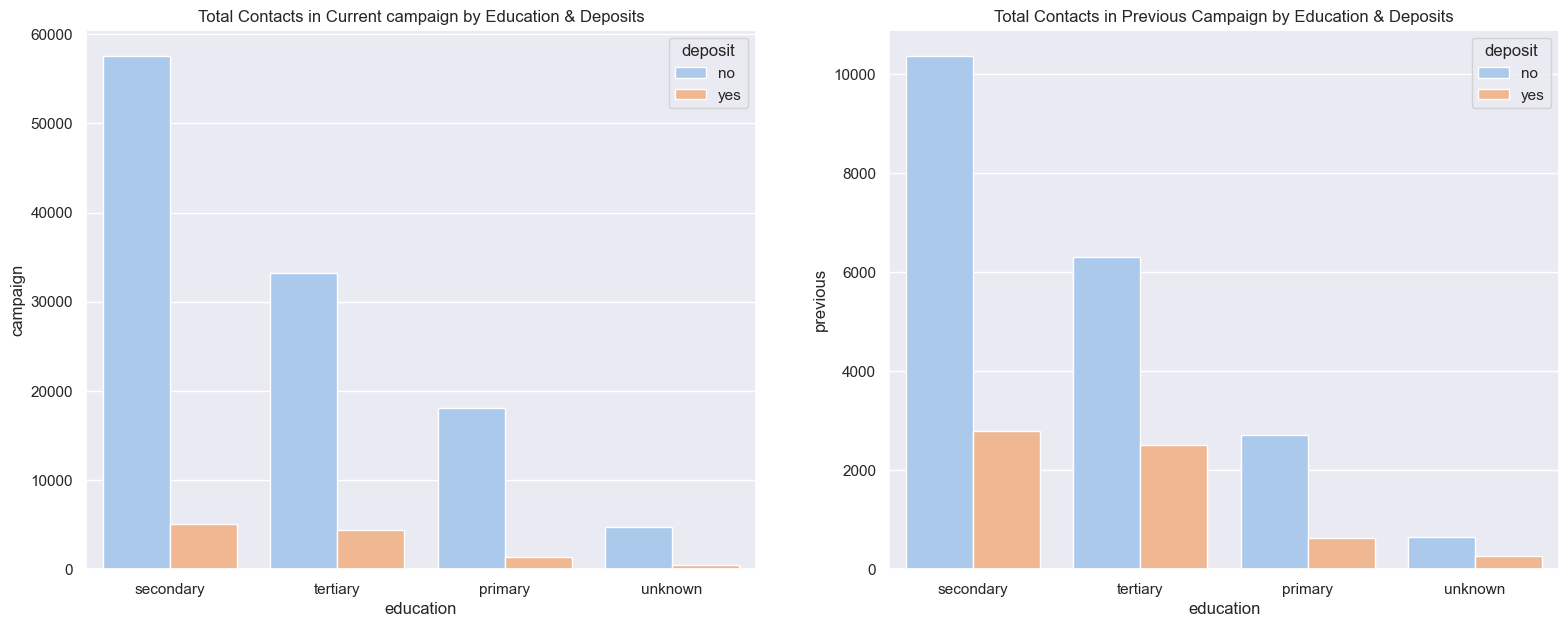

In [41]:
# We shall group the Education  and deposits against the Campaign
plt.figure(figsize=(19,7))

plt.subplot(1,2,1)
EduC = df.groupby(['education','deposit'])['campaign'].sum().sort_values(ascending=False).reset_index()
sns.barplot(x='education', data=EduC, y='campaign', hue='deposit', palette='pastel')
plt.title('Total Contacts in Current campaign by Education & Deposits')

plt.subplot(1,2,2)
EduP = df.groupby(['education','deposit'])['previous'].sum().sort_values(ascending=False).reset_index()
sns.barplot(x='education', data=EduP, y='previous', hue='deposit', palette='pastel')
plt.title('Total Contacts in Previous Campaign by Education & Deposits');

### By Education, the Current Campaign have not returned significant increase in deposits than previous contacts

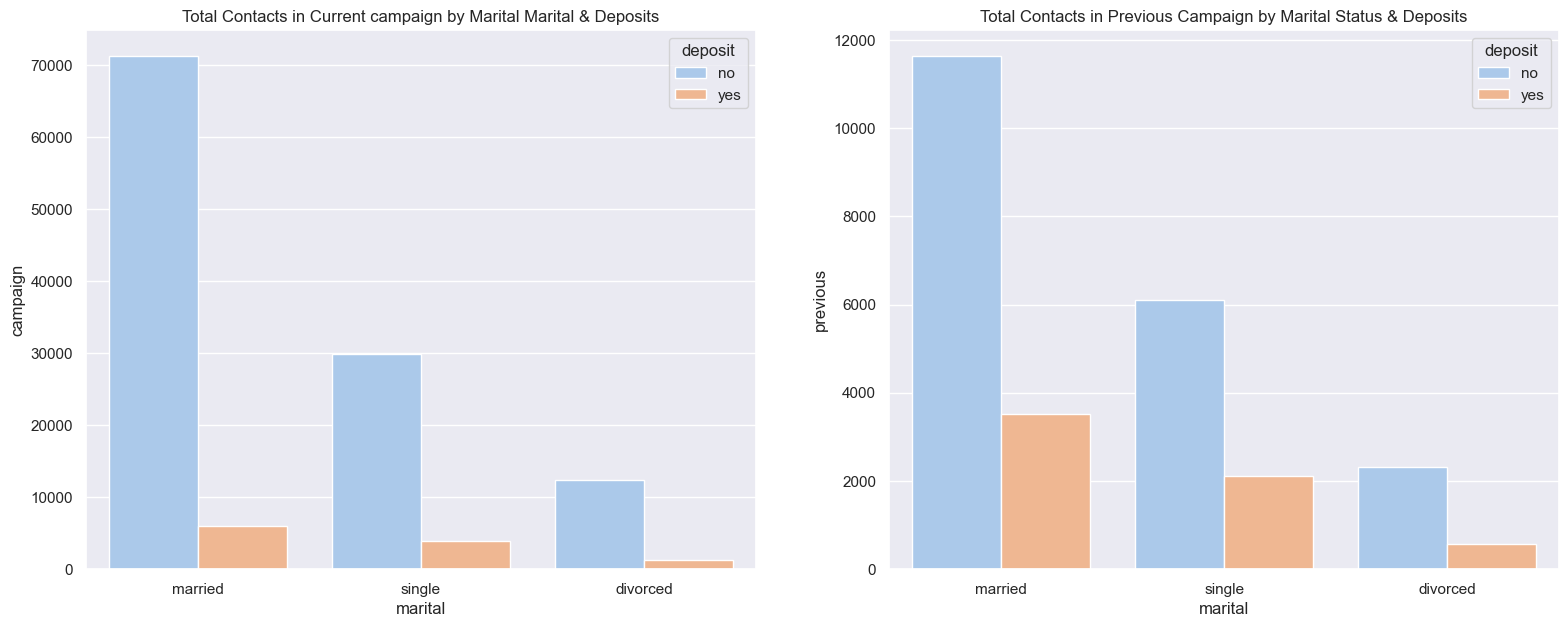

In [42]:
# We shall group the Marital and deposits against the Campaign 
plt.figure(figsize=(19,7))

plt.subplot(1,2,1)
MarC = df.groupby(['marital','deposit'])['campaign'].sum().sort_values(ascending=False).reset_index()
sns.barplot(x='marital', data=MarC, y='campaign', hue='deposit', palette='pastel')
plt.title('Total Contacts in Current campaign by Marital Marital & Deposits')

plt.subplot(1,2,2)
MarP = df.groupby(['marital','deposit'])['previous'].sum().sort_values(ascending=False).reset_index()
sns.barplot(x='marital', data=MarP, y='previous', hue='deposit', palette='pastel')
plt.title('Total Contacts in Previous Campaign by Marital Status & Deposits');

### By Marital status, the current campaign have not improved the deposits as it should

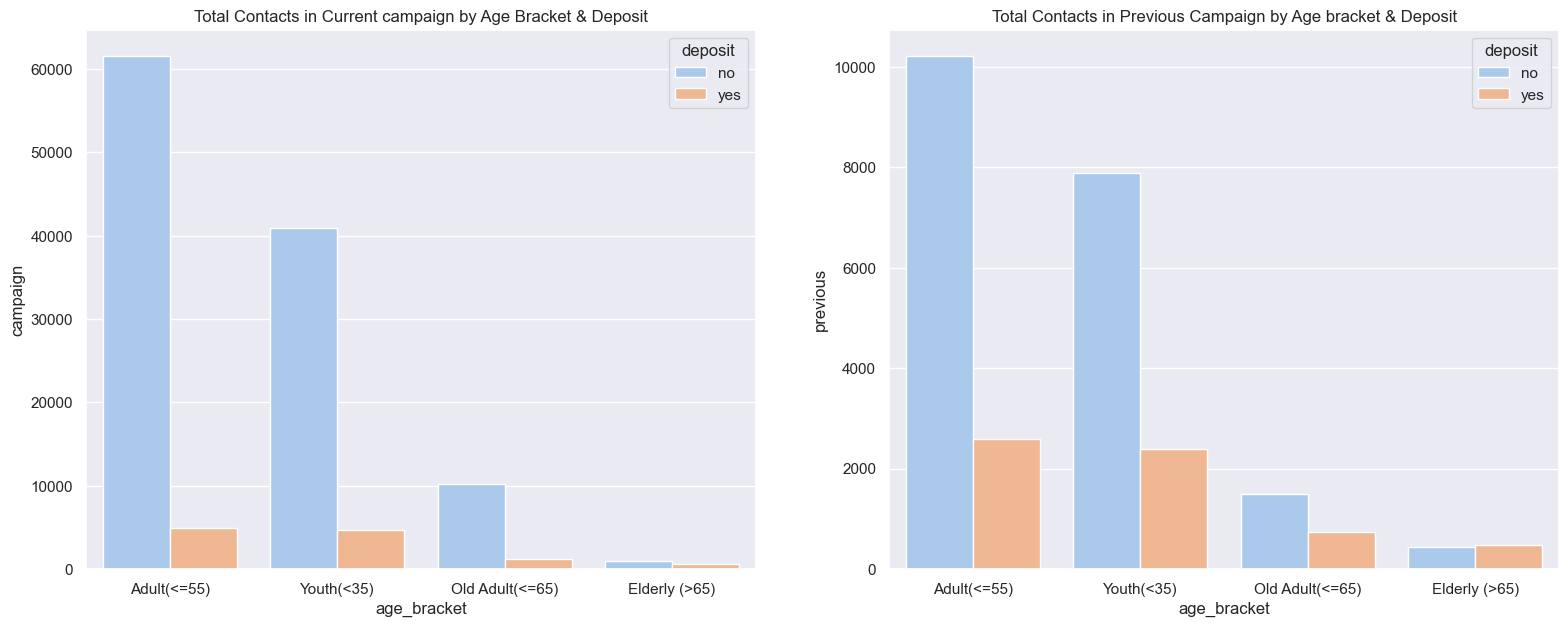

In [43]:
# We shall group the age_bracket and deposits against the Campaign
plt.figure(figsize=(19,7))

plt.subplot(1,2,1)
ageC = df.groupby(['age_bracket','deposit'])['campaign'].sum().sort_values(ascending=False).reset_index()
sns.barplot(x='age_bracket', data=ageC, y='campaign', hue='deposit', palette='pastel')
plt.title('Total Contacts in Current campaign by Age Bracket & Deposit')

plt.subplot(1,2,2)
ageP = df.groupby(['age_bracket','deposit'])['previous'].sum().sort_values(ascending=False).reset_index()
sns.barplot(x='age_bracket', data=ageP, y='previous', hue='deposit', palette='pastel')
plt.title('Total Contacts in Previous Campaign by Age bracket & Deposit');

### The previous campaign recorded higher success in deposits with less contacts, but the current campaign recorded lesser deposits with x6 more contacts.

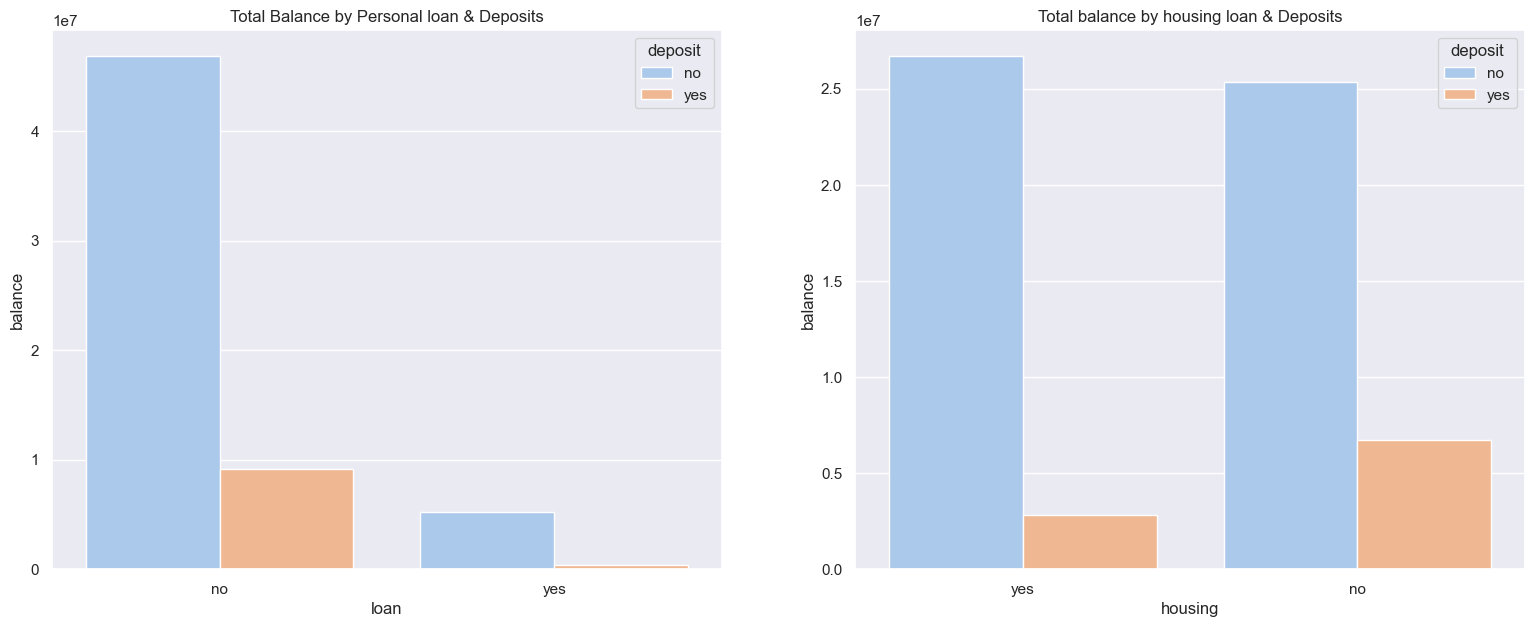

In [44]:
# We shall Visualise together the Personal & Housing Loan with highest Total Balance & Deposit
plt.figure(figsize=(19,7))

plt.subplot(1,2,1)
loanb = df.groupby(['loan','deposit'])['balance'].sum().sort_values(ascending=False).reset_index()
ax = sns.barplot(x='loan', data=loanb, y='balance', hue='deposit', palette='pastel')
plt.title('Total Balance by Personal loan & Deposits')


plt.subplot(1,2,2)
houB = df.groupby(['housing','deposit'])['balance'].sum().sort_values(ascending=False).reset_index()
ax = sns.barplot(y='balance', data=houB, x='housing',hue='deposit', palette='pastel')
plt.title('Total balance by housing loan & Deposits');

### On personal loan, customers who say 'No' to deposits have high balance

### On Housing Loans, both customers who say 'Yes' or 'No' to term deposits have good bank balance

## The Housing Loan & Default Across Customer Types

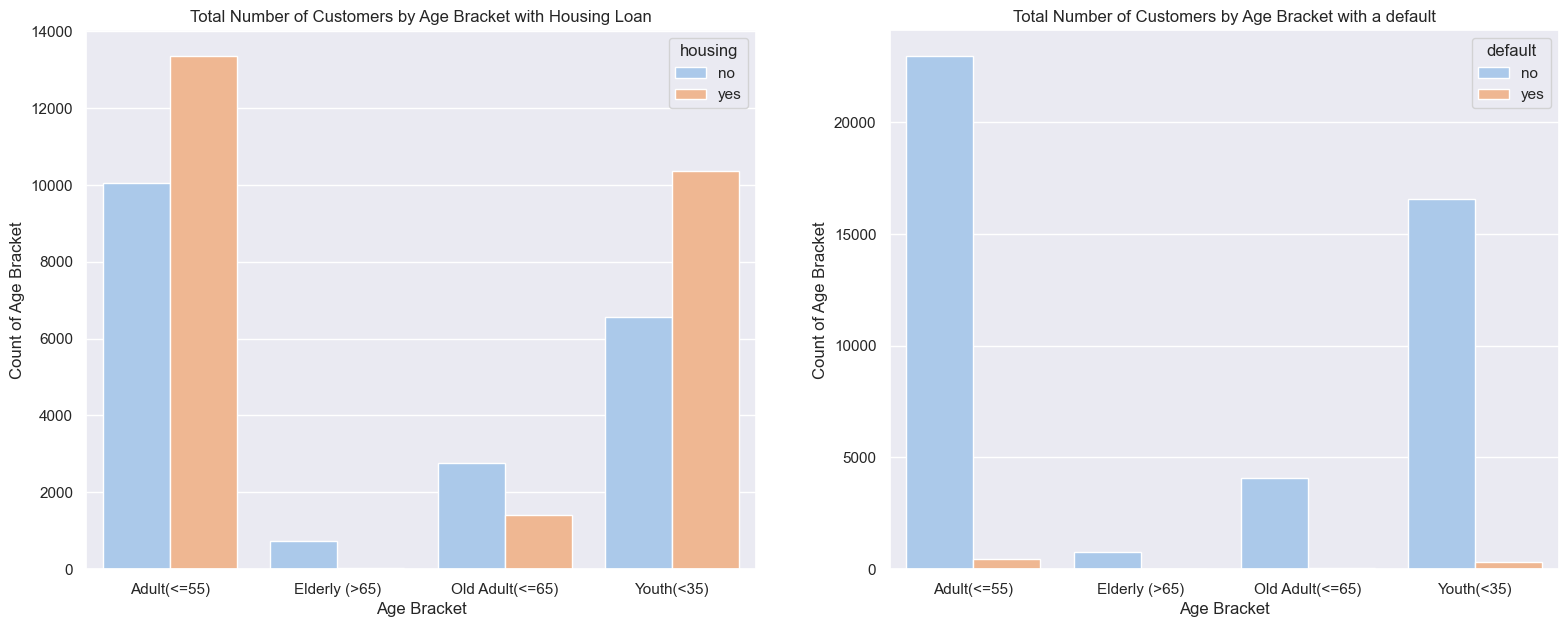

In [45]:
# Checking Customer age brackets have the most loans
plt.figure(figsize=(19,7))

plt.subplot(1,2,1)
ax = sns.countplot(x='age_bracket', data=df.sort_values(by='age_bracket'), hue='housing', palette='pastel')
plt.title('Total Number of Customers by Age Bracket with Housing Loan')
plt.xlabel('Age Bracket')
plt.ylabel('Count of Age Bracket')

# Checking the age Bracket with Most defaults
plt.subplot(1,2,2)
ax = sns.countplot(x='age_bracket', data=df.sort_values(by='age_bracket'), hue='default', palette='pastel')
plt.title('Total Number of Customers by Age Bracket with a default')
plt.xlabel('Age Bracket')
plt.ylabel('Count of Age Bracket');

#### The adults and youths have most of the housing Loans,  and also have the most defaults

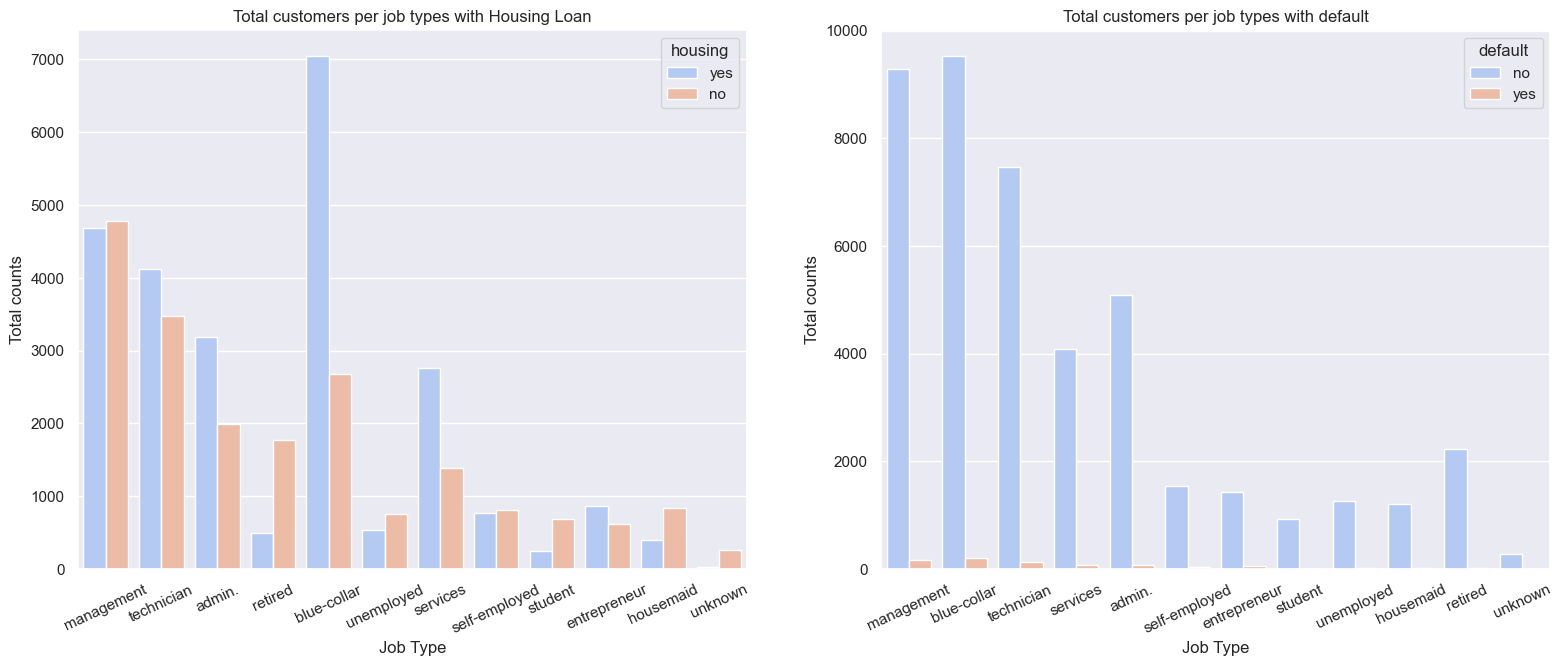

In [46]:
# Counting the Job Types with Most Housing loans
plt.figure(figsize=(19,7))

plt.subplot(1,2,1)
ax = sns.countplot(x='job', hue='housing', data=df.sort_values(by='loan'), palette='coolwarm')
plt.title('Total customers per job types with Housing Loan')
plt.xlabel('Job Type')
plt.ylabel('Total counts')
plt.xticks(rotation=25);

# Checking the age Bracket with Most defaults
plt.subplot(1,2,2)
ax = sns.countplot(x='job', hue='default', data=df.sort_values(by='default'), palette='coolwarm')
plt.title('Total customers per job types with default')
plt.xlabel('Job Type')
plt.ylabel('Total counts')
plt.xticks(rotation=25);

### Management, Technicians and Blue collar are top 3 that say 'Yes' to housing Loan, 
### Enterprenuer, unemployed and blue-collar returned as the most defaulters by proportion in our dataset

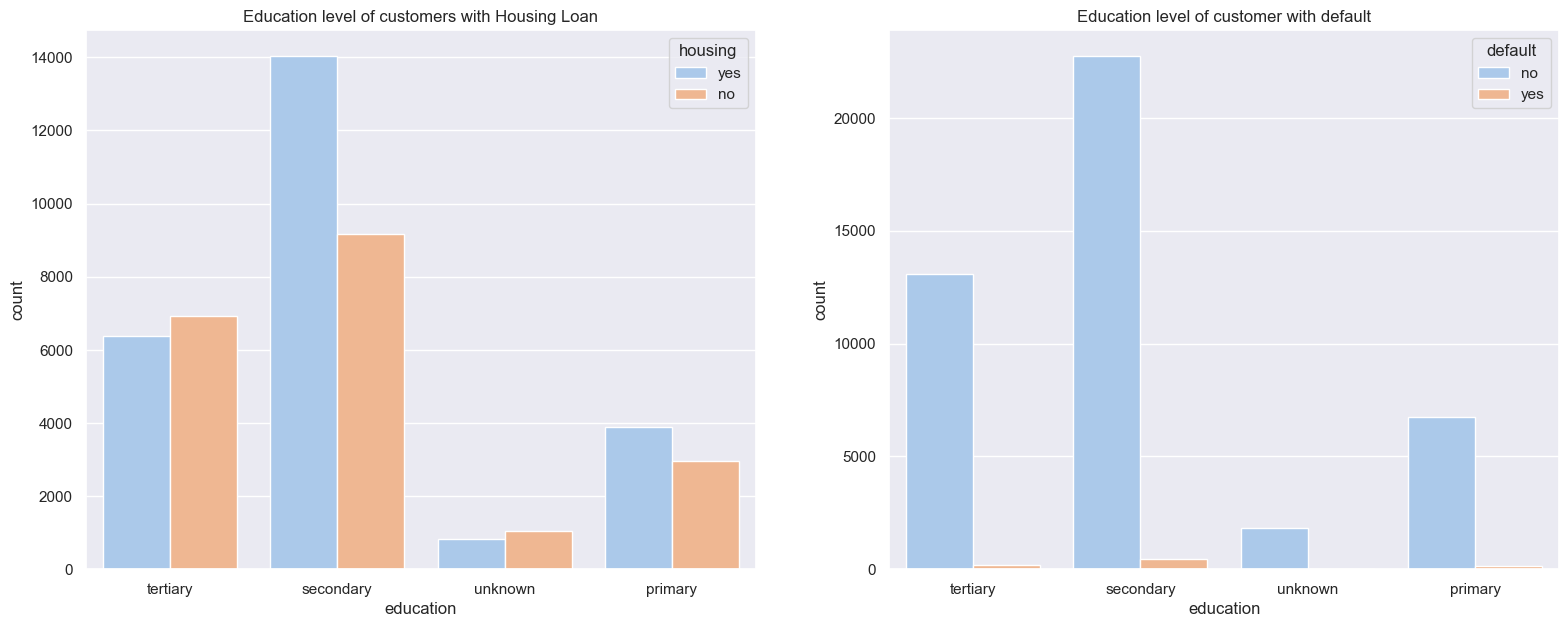

In [47]:
# Counting the Education Types with Most Housing loans
plt.figure(figsize=(19,7))

plt.subplot(1,2,1)
ax = sns.countplot(x='education', data=df, hue='housing', palette='pastel')
plt.title('Education level of customers with Housing Loan')

# Defaults by educations
plt.subplot(1,2,2)
ax = sns.countplot(x='education', data=df, hue='default', palette='pastel')
plt.title('Education level of customer with default');

### Secondary education is the highest as well as the highest defaulters

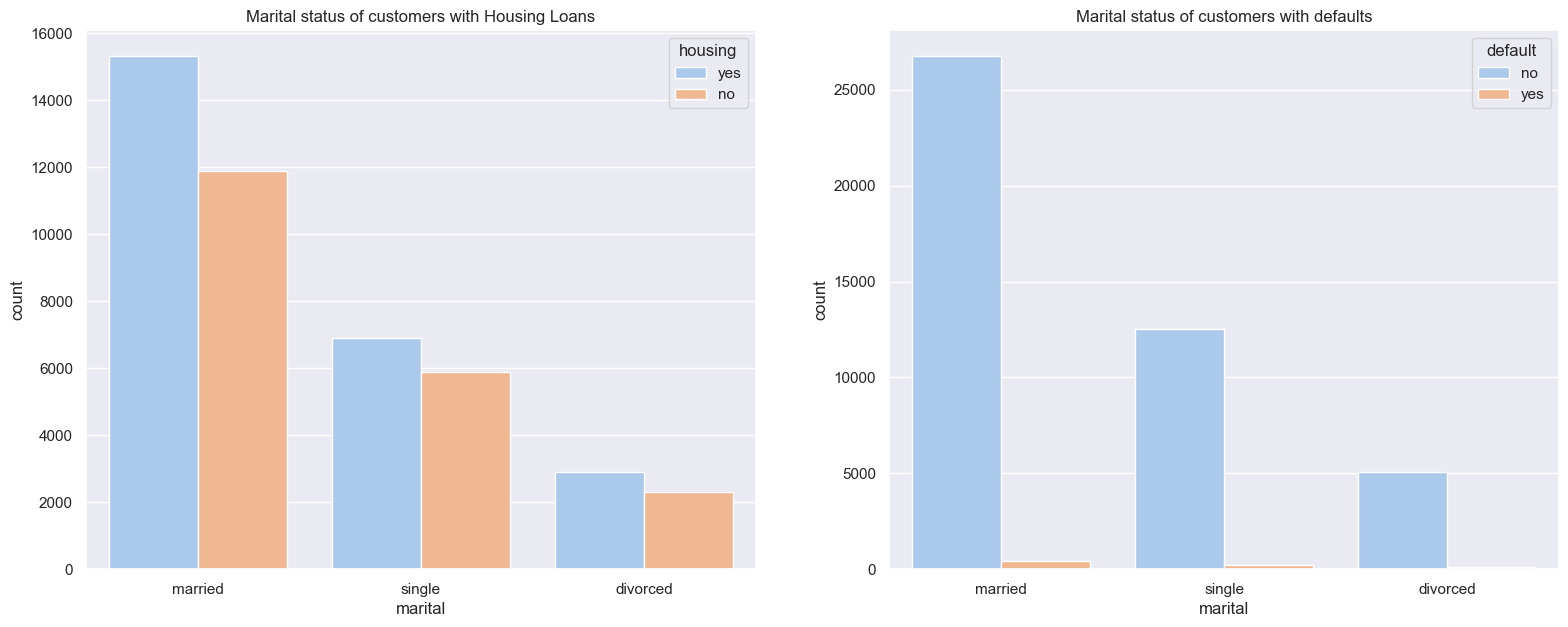

In [48]:
#Investigating the marital status of Cusomers with Hosuing Loan and also their default
plt.figure(figsize=(19,7))

plt.subplot(1,2,1)
ax = sns.countplot(x='marital', data=df, hue='housing', palette='pastel')
plt.title('Marital status of customers with Housing Loans')

# Defaults by marital
plt.subplot(1,2,2)
ax = sns.countplot(x='marital', data=df, hue='default', palette='pastel')
plt.title('Marital status of customers with defaults');

### The married customers have the most housing Loans, 

### Married customer will be seen to have the highest default, but proportion wise, the default is most likley in divorced people, then single, and married people have the least default by proportion

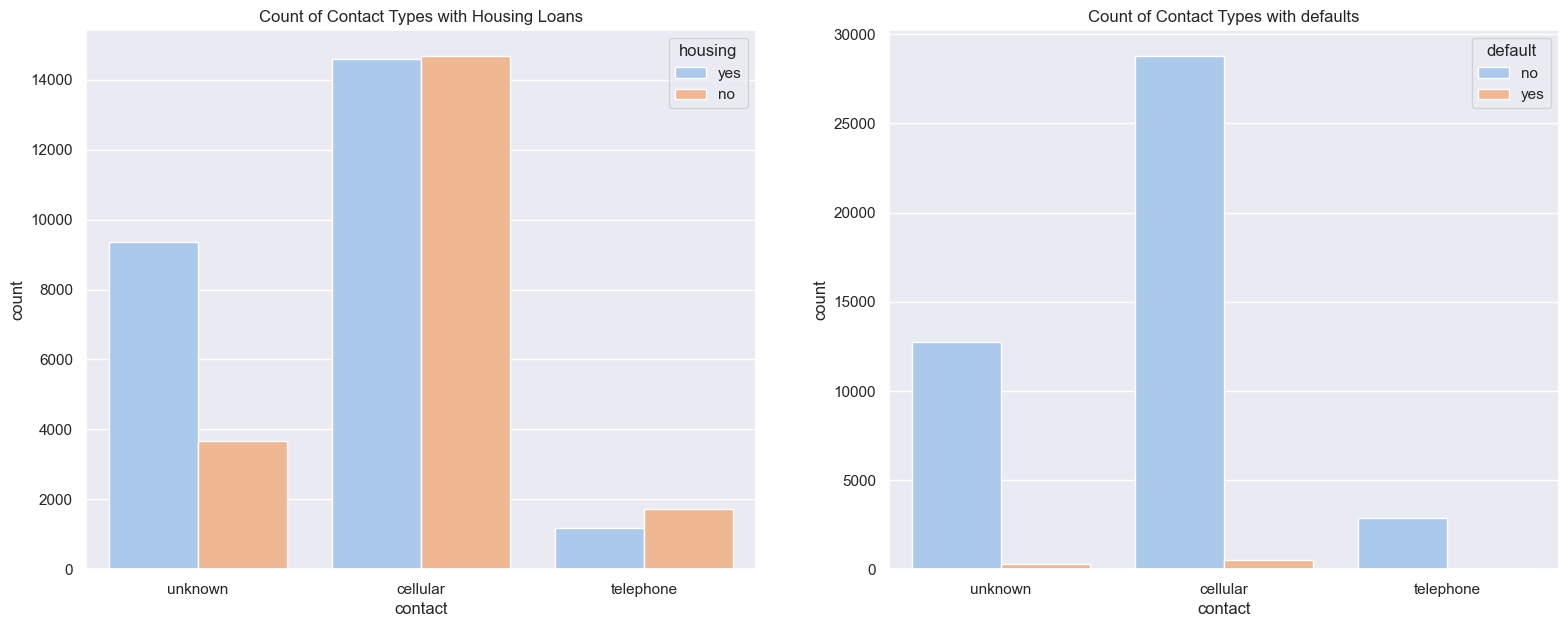

In [49]:
# Investigating the Contact types used to reach the customers
plt.figure(figsize=(19,7))

plt.subplot(1,2,1)
ax = sns.countplot(x='contact', data=df, hue='housing', palette='pastel')
plt.title('Count of Contact Types with Housing Loans')

# Defaults by contacts
plt.subplot(1,2,2)
ax = sns.countplot(x='contact', data=df, hue='default', palette='pastel')
plt.title('Count of Contact Types with defaults');

### Customers contacted by celluar have the most housing loans, 

### Customers with unknown contact type are most likely to default in their loans

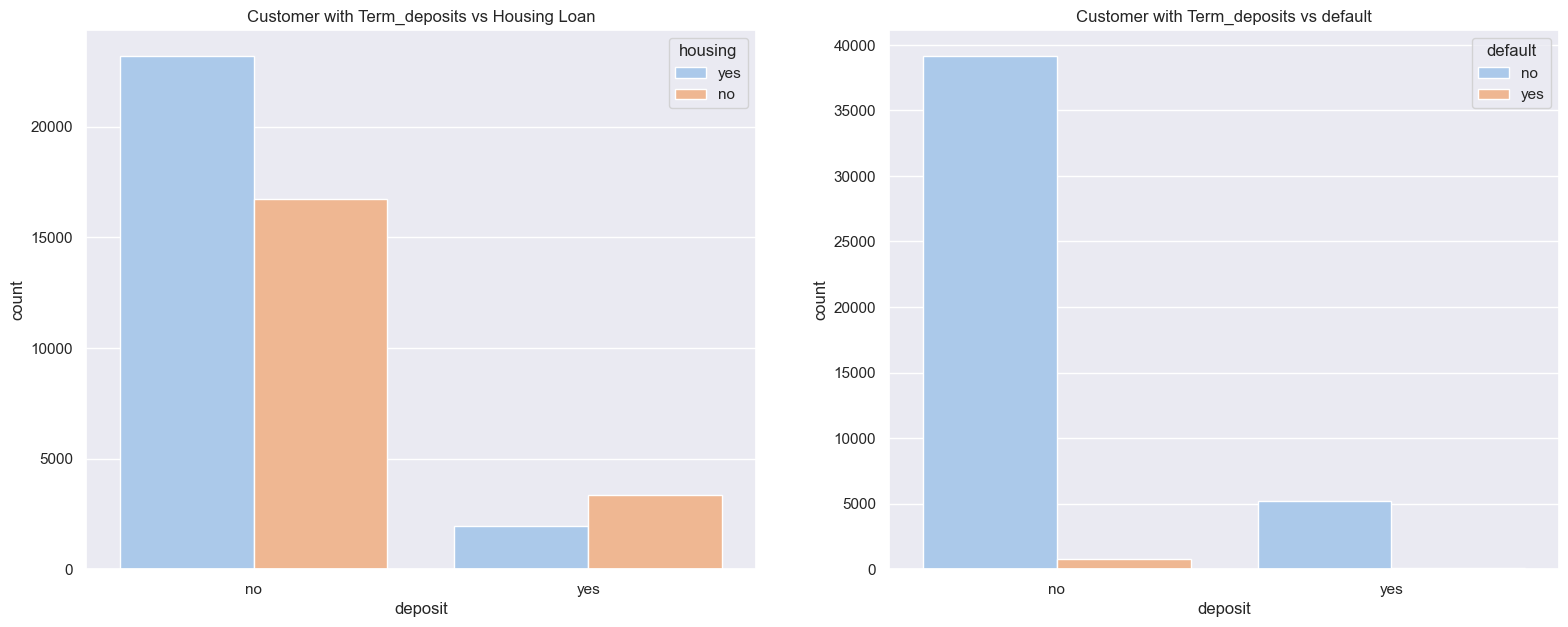

In [50]:
# Investigating the Term Deposit by customer
plt.figure(figsize=(19,7))

plt.subplot(1,2,1)
ax = sns.countplot(x='deposit', data=df, hue='housing', palette='pastel')
plt.title('Customer with Term_deposits vs Housing Loan')

# Defaults by Term Deposits
plt.subplot(1,2,2)
ax = sns.countplot(x='deposit', data=df, hue='default', palette='pastel')
plt.title('Customer with Term_deposits vs default');

### Most customers who say No to Term deposit subsribe for housing Loans and also have the most defaults

## Who are the Customers with the Least Deposit by proportion? These are those Customers who should be the Target for Fixed Deposit as regards to Next Campaigns

- We identified them as follows, 

##### Age Bracket: The adults  and the Youths (0 - 55yrs)  customer make up a high  number of customers, but on the contrary, the contribute least proportion wise to the deposits, hence these are the people marketting campaigns shold be targeted towards.  we can also say that old adults and elderly are most interested in deposits

##### Job- Type: Blue-collar, Entreprenuer and services have the least deposit by their total counts and should also included in the target for campaign

##### Marital: Married customers have the least deposits compared to their total count and they should also be target for campaigns



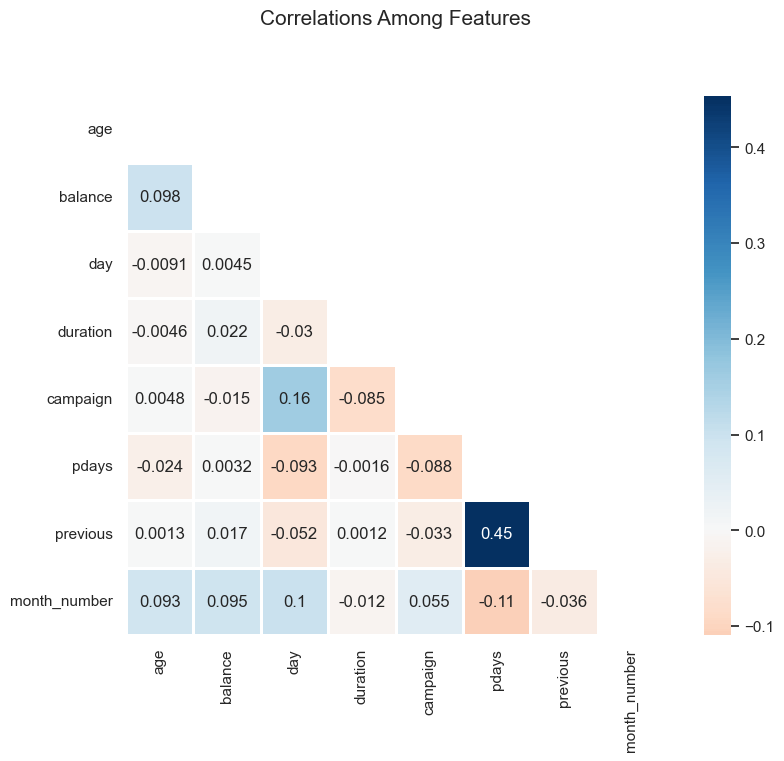

In [51]:
## heatmeap to see the correlation between features. 
# Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.set_style('whitegrid')
plt.subplots(figsize = (10,7))
sns.heatmap(df.corr(), 
            annot=True,
            mask = mask,
            cmap = 'RdBu',
            linewidths=.9, 
            linecolor='white',
            fmt='.2g',
            center = 0,
            square=True)
plt.title("Correlations Among Features", y = 1.03,fontsize = 15, pad = 40);

### We can see that none of the features have a good positive or negative correlation among them. The pdays and previous have a slight positive correlation

### The Overall Insights
#### The Univariate Analysis

- 1. After placing our customers into Buckets, we noticed that most of the bank customers are between 35 - 55 years as adults, followed by youths of less/equal to 35years.
- 2 The highest education attained by majority of the customer is secondary education with 51%
- 3. The Blue-collar, management and technician Job category are more predominant in our data set, while housemaid, student and few unknowns are the least.
- 4. We have most of the customers as married people, but in General, the bank records a ver low default percentage of about 1.8%
- 5. We have more of the customers taking housing loan than they are taking personal loan.
- 6. Only 11.7% of all bank customers subscribe to Fixed term deposits with a higher number saying No to it, we also noticed that most occurig activity happenned in May, June, July and August which is coinciding with the peak of the current campaign which increased steadily from April and peaking in August
- 7. We can say that the campaign metrics are not properly measured as the bank have lots of campaing outcome as unknown and even failure is more in number than success.

#### The Bivariate Analysis - (with emphasis on deposits)

- 1. As regards to deposits, we identified the following as having low deposits:
- a. Customer age bracket:  (0 - 55yrs) as (adults and the Youths) make up a high number of customers, but on the contrary, the contribute least proportion wise to the deposits,
- b. Customer Educations level: Customers with education level as secondary and primary contribute the lower deposits but have a higher number of counts. By proportion to their numbers, their deposits are low.
- c. Job category: Blue-collar, entrepreneur and services contribute least to the deposits by Job category
- d. Maried customers have the highest number in our dataset also recorded the lowest deposits amongst the other marital status 
- Customers who are saying No to any form of Loan (both Housing and Personal loan) show more Interest in term deposits
##### On this note, we can recommend that these customer listed above should be mostly targetted for Campaign to improve the term deposits in the banks.

#### The Multivariate Analysis - (with reference wit Campaign contacts and Previous Contacts
- 1. On the multivariate analysis, although the number of contacts increased in this campaign compared to the previous contacts made before, the data shows that the increased contact time have returned a corresponding output or positive outcome to improve term deposits, hence the high failure rate in the outcome.
- 2. On all the features checked, there was no significant/corresponding  increase to the term deposits. Although duration on calls with customer was seen to improve slightly on the term deposits the banks were receiving, but overall, the campaign deposits are cummulatively low. Further on the lineplot of the previous contacts vs months vs deposits, we can could clearly see an increase subscription to deposits. On the lineplot of campaign contacts vs months vs deposits, the opposite to the above was seen.

- Further checking the mode of contacts between the previous contacts and the campaign, we could see that predominant contacts were the cellular, then on the current campaihn a good number of the contacts were tagged as unknown in the dataset, could it be possibly contributing to low deposit subscriptions? There is no further metrics to confirm this analogy.

### Finally,
- Although there was no much of an issue in regard to the loan default, but we dug deeper to profile the customer segments/features who are likely to default based on the Loan, see below list;
- Customer age bracket: the old adults (55-65yrs) are most likely to default in Loan
- Marital Status: Divorced customer are most liley to default
- Contacts: Customer with unknown contacts are highly likely to default.
- Education: Customer with highest education as secondary also have the highest default numbers
- Job- Category: Enterprenuer, unemployed and blue-collar returned as the most defaulters in our dataset
- Deposits: Customers with no term deposits say yes the most to loans, also have the higher tendency to default in the loans

### i.e. any customer between 55-65yrs, whole may be divorced, mostly with unknown contacts, with job-type to be either entreprenuer, unemployed or a blue-collar, with no deposit; if the profile fits the above, then customer is moslty likely to default.


# Unsupervised Machine Learning
- Using Kmeans Method

In [52]:
#Create a Copy of the Original DataFrame
df2 = df.copy()
df2.head(2)

age         job  marital  education default  balance housing loan  contact  \
0   58  management  married   tertiary      no     2143     yes   no  unknown   
1   44  technician   single  secondary      no       29     yes   no  unknown   

   day month  duration  campaign  pdays  previous poutcome deposit  \
0    5   may       261         1      1         0  unknown      no   
1    5   may       151         1      1         0  unknown      no   

   month_number      age_bracket  
0             5  Old Adult(<=65)  
1             5      Adult(<=55)

In [53]:
# We shall drop some features we dont consider important to our models as below; Most of these feature are skewed
# and may cause our model to be biased
df3 = df2.drop(['default','contact','campaign','pdays','poutcome','age_bracket'], axis=1)
df3

age           job   marital  education  balance housing loan  day  \
0       58    management   married   tertiary     2143     yes   no    5   
1       44    technician    single  secondary       29     yes   no    5   
2       33  entrepreneur   married  secondary        2     yes  yes    5   
3       47   blue-collar   married    unknown     1506     yes   no    5   
4       33       unknown    single    unknown        1      no   no    5   
...    ...           ...       ...        ...      ...     ...  ...  ...   
45206   51    technician   married   tertiary      825      no   no   17   
45207   71       retired  divorced    primary     1729      no   no   17   
45208   72       retired   married  secondary     5715      no   no   17   
45209   57   blue-collar   married  secondary      668      no   no   17   
45210   37  entrepreneur   married  secondary     2971      no   no   17   

      month  duration  previous deposit  month_number  
0       may       261         0      no             5  
1       may       151         0      no             5  
2       may        76         0      no             5  
3       may        92         0      no             5  
4       may       198         0      no             5  
...     ...       ...       ...     ...           ...  
45206   nov       977         0     yes            11  
45207   nov       456         0     yes            11  
45208   nov      1127         3     yes            11  
45209   nov       508         0      no            11  
45210   nov       361        11      no            11  

[45211 rows x 13 columns]

In [54]:
# We shall also drop the Target Column
df3a = df3.drop(['deposit'], axis=1)
df3a

age           job   marital  education  balance housing loan  day  \
0       58    management   married   tertiary     2143     yes   no    5   
1       44    technician    single  secondary       29     yes   no    5   
2       33  entrepreneur   married  secondary        2     yes  yes    5   
3       47   blue-collar   married    unknown     1506     yes   no    5   
4       33       unknown    single    unknown        1      no   no    5   
...    ...           ...       ...        ...      ...     ...  ...  ...   
45206   51    technician   married   tertiary      825      no   no   17   
45207   71       retired  divorced    primary     1729      no   no   17   
45208   72       retired   married  secondary     5715      no   no   17   
45209   57   blue-collar   married  secondary      668      no   no   17   
45210   37  entrepreneur   married  secondary     2971      no   no   17   

      month  duration  previous  month_number  
0       may       261         0             5  
1       may       151         0             5  
2       may        76         0             5  
3       may        92         0             5  
4       may       198         0             5  
...     ...       ...       ...           ...  
45206   nov       977         0            11  
45207   nov       456         0            11  
45208   nov      1127         3            11  
45209   nov       508         0            11  
45210   nov       361        11            11  

[45211 rows x 12 columns]

In [55]:
from sklearn.preprocessing import LabelEncoder

# label Encoding
encoder = LabelEncoder() # method initialisation

# Looping for columns except Survived
for c in df3a.columns[1:]:
    if(df3a[c].dtype=='object'):
        df3a[c] = encoder.fit_transform(df3a[c])
    else:
        df3a[c] = df3a[c]
df3a.head()

age  job  marital  education  balance  housing  loan  day  month  duration  \
0   58    4        1          2     2143        1     0    5      8       261   
1   44    9        2          1       29        1     0    5      8       151   
2   33    2        1          1        2        1     1    5      8        76   
3   47    1        1          3     1506        1     0    5      8        92   
4   33   11        2          3        1        0     0    5      8       198   

   previous  month_number  
0         0             5  
1         0             5  
2         0             5  
3         0             5  
4         0             5

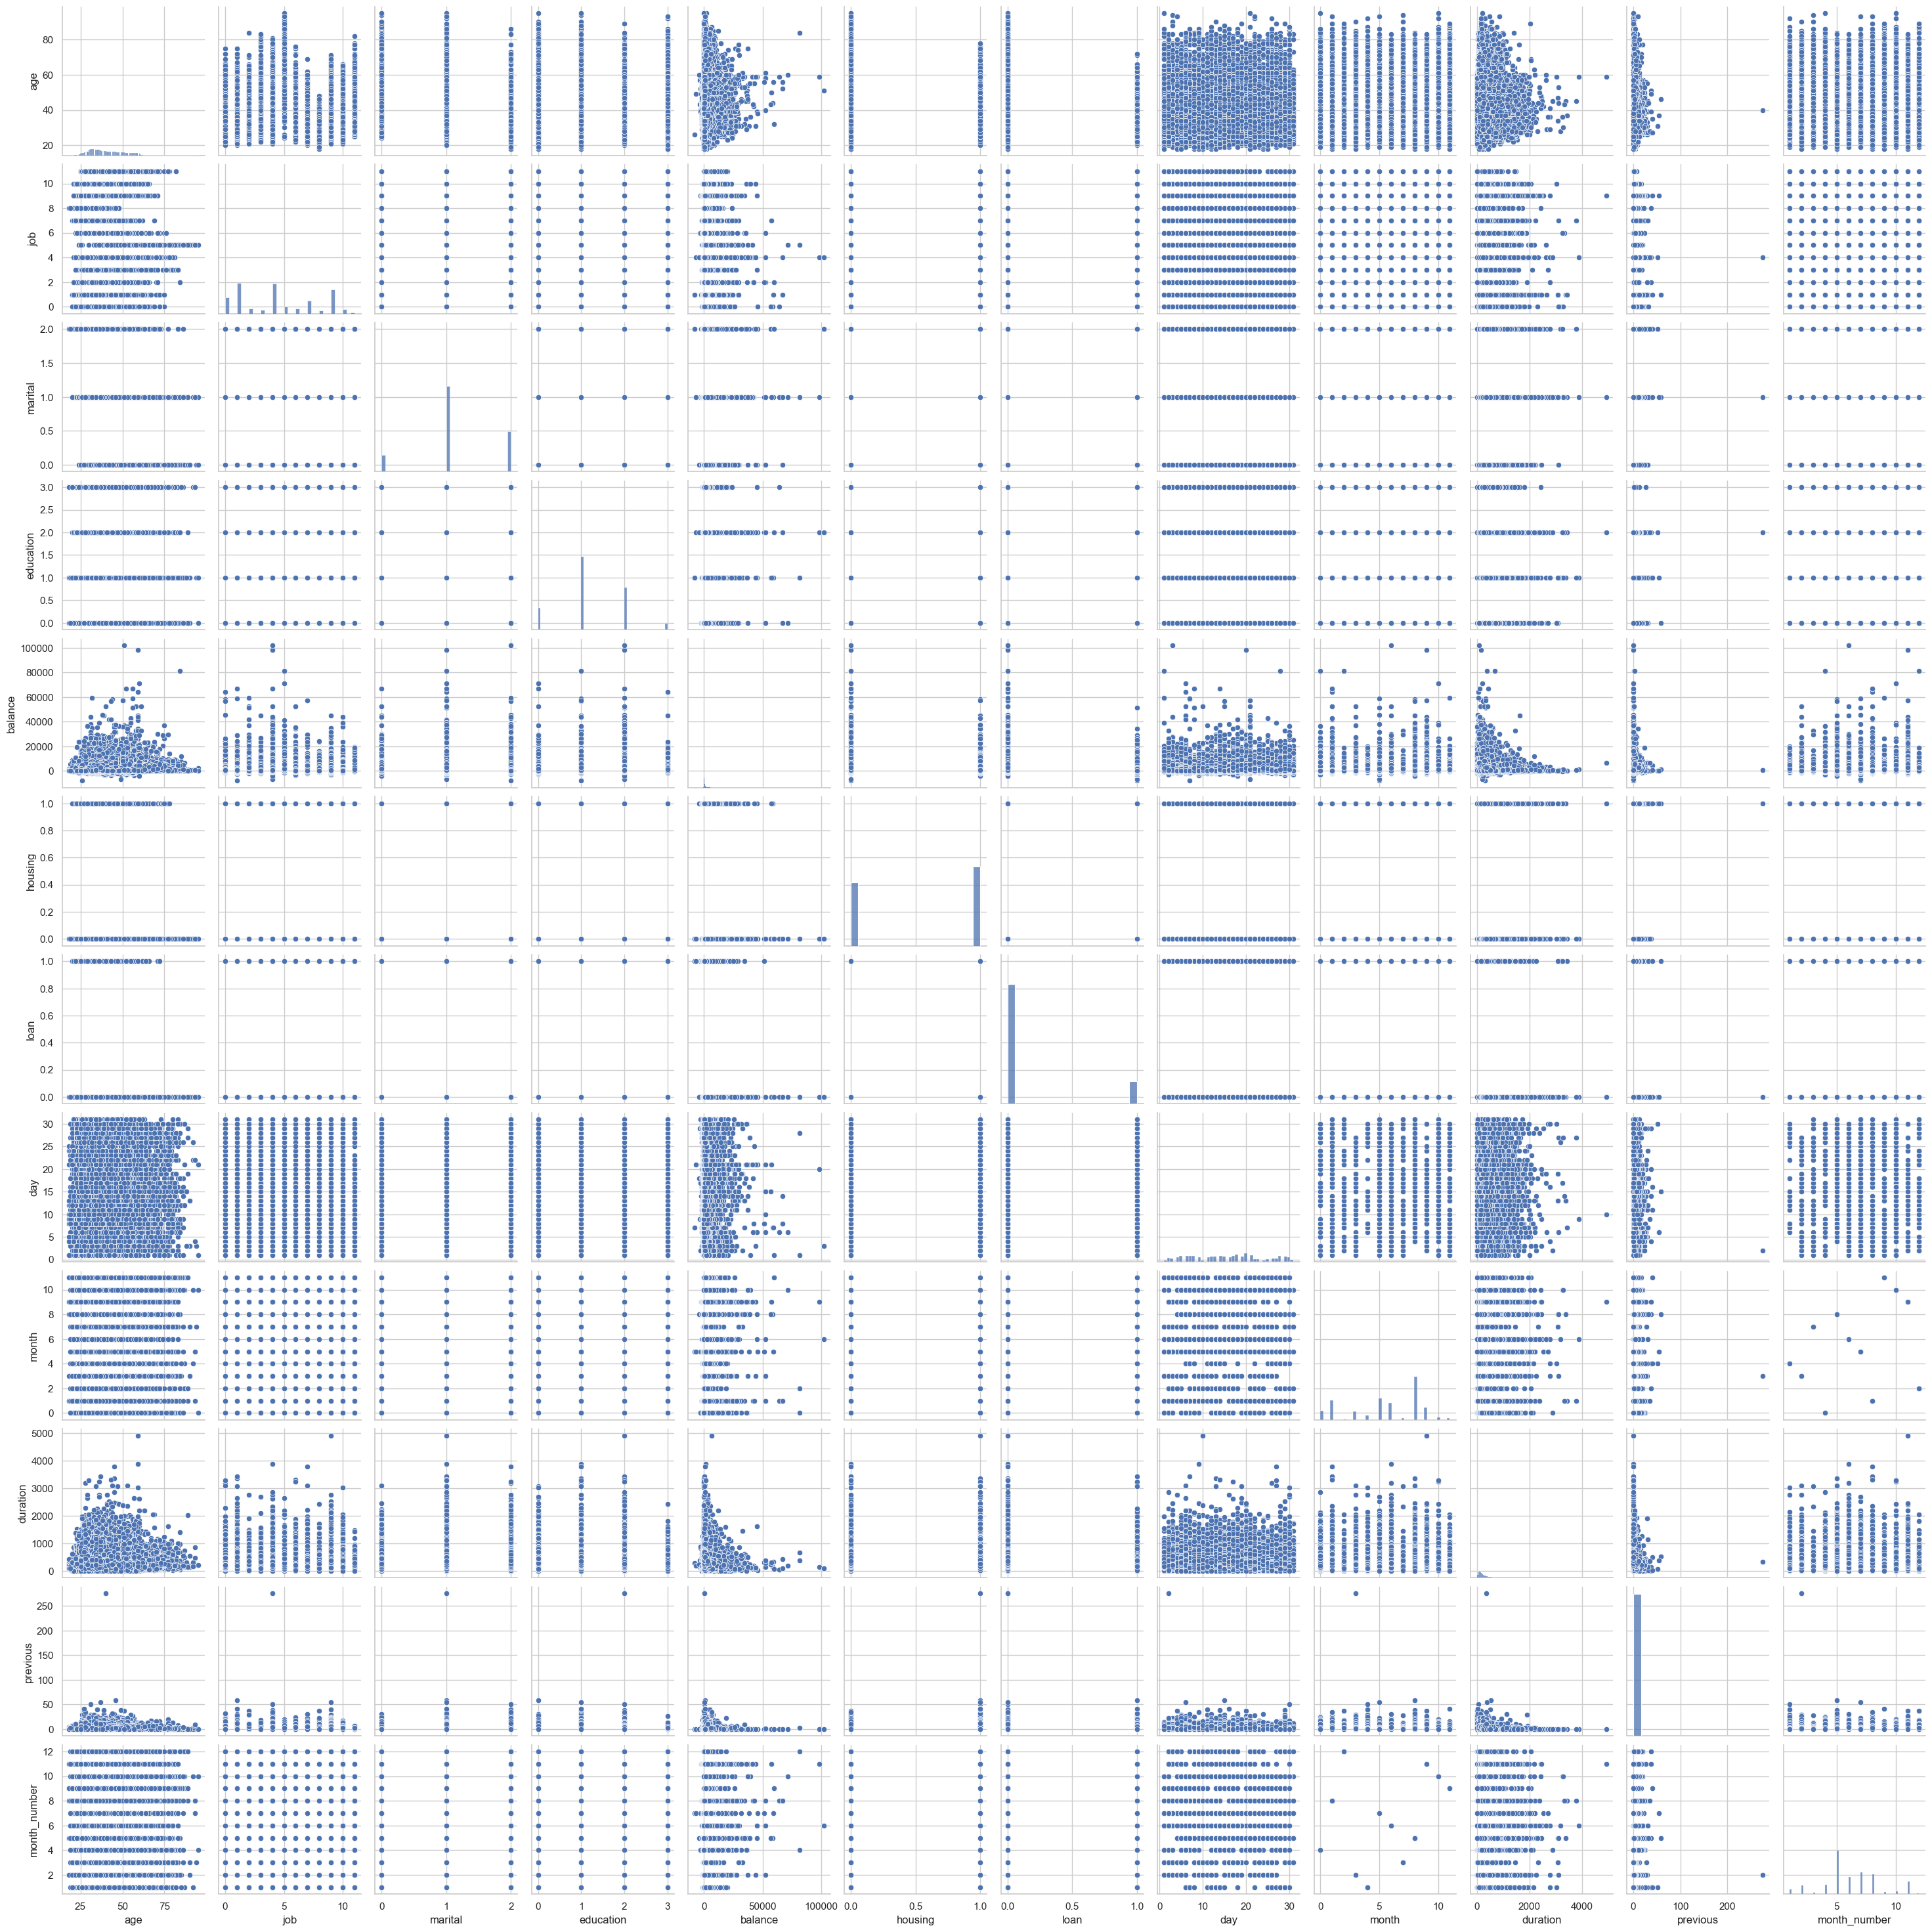

In [56]:
# Pairplot of the Numerical Variables
sns.pairplot(df3a, size=2.5);
plt.show()

- We decided to observe the below relationship to form our clusters
- 1. Age & Housing Loan
- 2. Age & Day
- 3. Age and Duration
- 4. Balance and Duration
- 5. Age and balance
#### We shall also use our silhouette_score to evaluate the Clusters we formed.

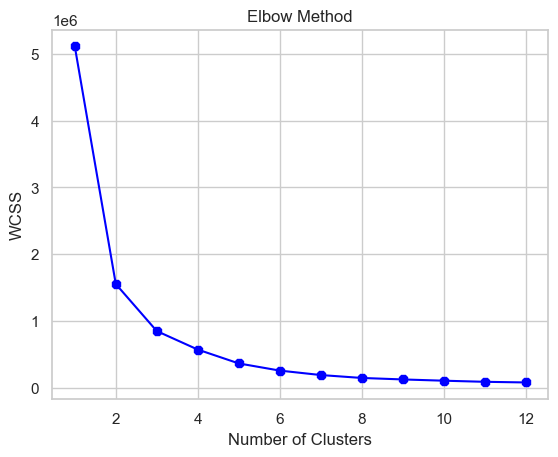

In [57]:
# Determine the  optimal number of clusters for Age and housing
X1 =df3a.loc[:, ['age', 'housing']].values

wcss = []
for i in range(1, 13):
    kmeans =KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 13), wcss, color='blue', marker='8')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [58]:
kmeans = KMeans(n_clusters=3)

label = kmeans.fit_predict(X1)

print(label)

[0 1 2 ... 0 0 1]


In [59]:
print(kmeans.cluster_centers_)

[[55.7466035   0.39882016]
 [42.02593076  0.60065317]
 [31.18992144  0.61304975]]


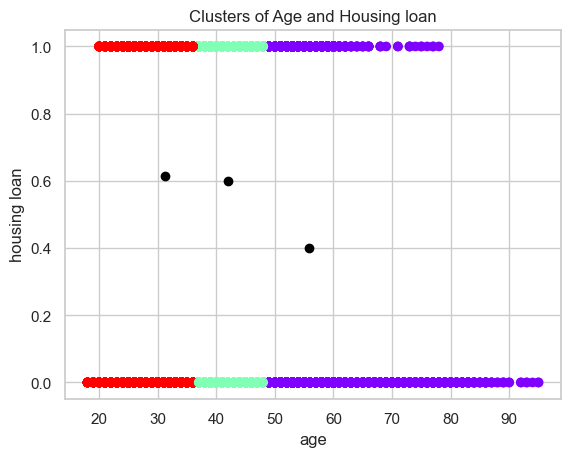

0.5480789017969884

In [60]:
plt.scatter(X1[:,0],X1[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='black')
plt.title('Clusters of Age and Housing loan')
plt.xlabel('age')
plt.ylabel('housing loan')
plt.show()
silhouette_score(X1, kmeans.labels_)

### Housing loan spans across all ages and we have more people saying No from 50 - 90+ years. The evaluation is also 55%

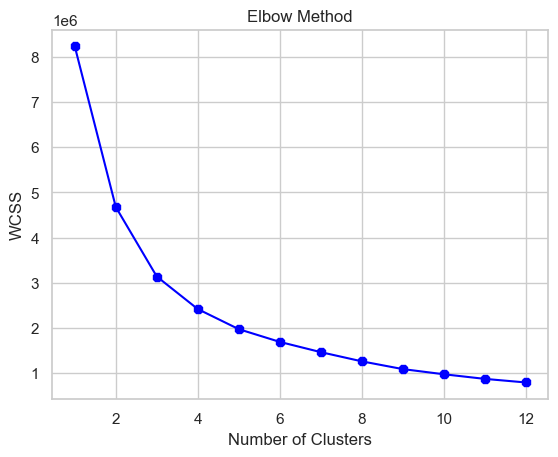

In [61]:
# Determine the  optimal number of clusters for Age and Campaign
X2 =df3a.loc[:, ['age', 'day']].values

wcss = []
for i in range(1, 13):
    kmeans =KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X2)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 13), wcss, color='blue', marker='8')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [62]:
kmeans = KMeans(n_clusters=5)

label = kmeans.fit_predict(X2)

print(label)

[1 3 4 ... 1 1 0]


In [63]:
print(kmeans.cluster_centers_)

[[33.29853508 22.88781804]
 [59.07652474 10.82796318]
 [50.03975    23.698875  ]
 [43.94369548  9.693214  ]
 [31.63245098  8.44696078]]


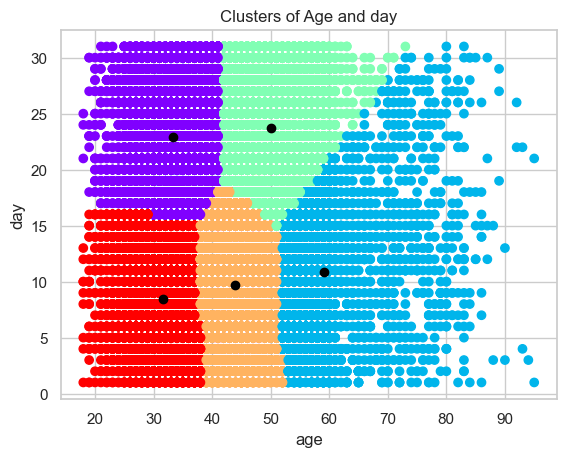

0.3655573168253755

In [64]:
plt.scatter(X2[:,0],X2[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='black')
plt.title('Clusters of Age and day')
plt.xlabel('age')
plt.ylabel('day')
plt.show()
silhouette_score(X2, kmeans.labels_)

### We have 5 clusters in age and day. From ages >65 (Elderly), they can be contacted in any of the days, however other ages varies between days 

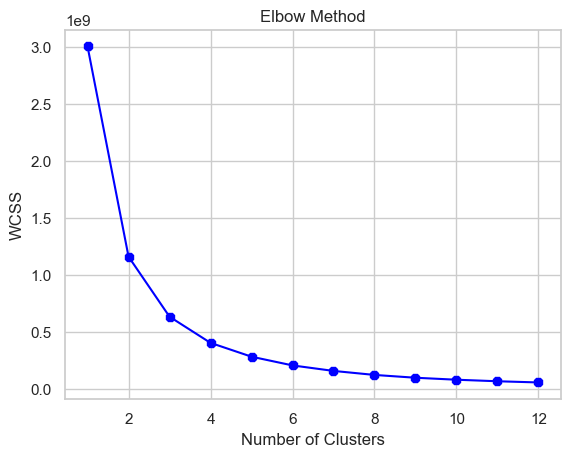

In [65]:
# Determine the  optimal number of clusters for Age and Duration
X3 =df3a.loc[:, ['age', 'duration']].values

wcss = []
for i in range(1, 13):
    kmeans =KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X3)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 13), wcss, color='blue', marker='8')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [66]:
kmeans = KMeans(n_clusters=3)

label = kmeans.fit_predict(X3)

print(label)

[0 0 0 ... 1 2 2]


In [67]:
print(kmeans.cluster_centers_)

[[  41.01498871  143.9186456 ]
 [  41.20052083 1140.72239583]
 [  40.62576992  466.91108683]]


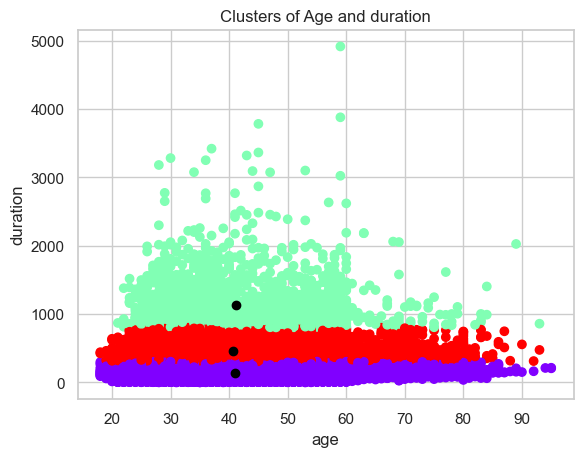

0.6372132638429149

In [68]:
plt.scatter(X3[:,0],X3[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='black')
plt.title('Clusters of Age and duration')
plt.xlabel('age')
plt.ylabel('duration')
plt.show()
silhouette_score(X3, kmeans.labels_)

### We can also see that duration is segmented across all ages, but we can see that elderly have mostly low durations in calls. with a silhouette score of 63%

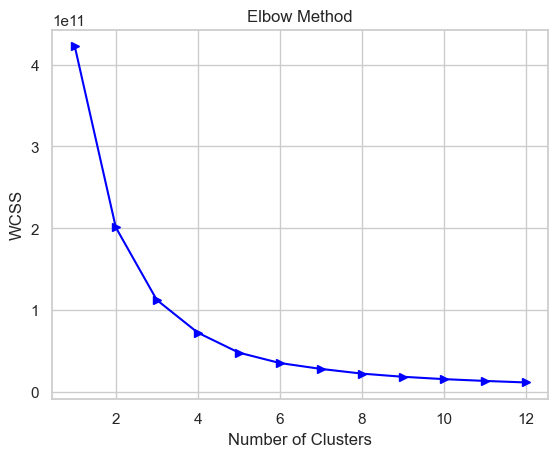

In [69]:
# Determine the  optimal number of clusters for Age and Campaign
X4 =df3a.loc[:, ['balance', 'duration']].values

wcss = []
for i in range(1, 13):
    kmeans =KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X4)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 13), wcss, color='blue', marker='>')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [70]:
kmeans = KMeans(n_clusters=4)

label = kmeans.fit_predict(X4)

print(label)

[0 0 0 ... 2 0 2]


In [71]:
print(kmeans.cluster_centers_)

[[  527.08995708   255.14311941]
 [15027.59598494   260.69259724]
 [ 4705.54324895   278.14644866]
 [47363.09615385   279.55769231]]


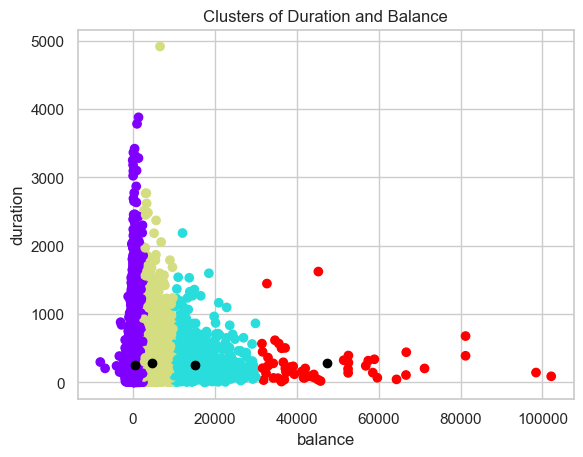

0.7373523658527688

In [72]:
plt.scatter(X4[:,0],X4[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='black')
plt.title('Clusters of Duration and Balance')
plt.xlabel('balance')
plt.ylabel('duration')
plt.show()
silhouette_score(X4, kmeans.labels_)

### Those customers with low balances needs a lot more time to convince, hence more duration. But customers with higher balance need less time/duration to speak to about term deposits. Silhouetter score is 73%

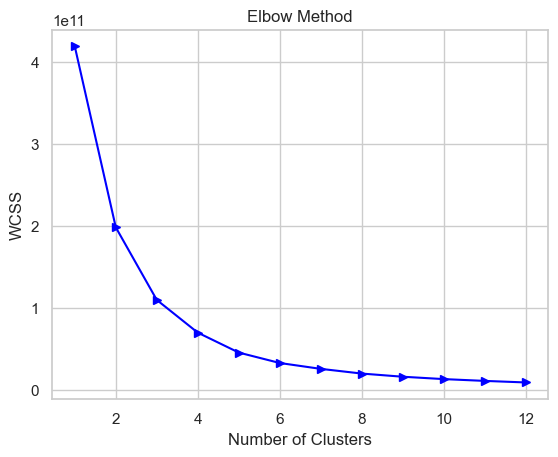

In [74]:
# Determine the  optimal number of clusters for Age and Campaign
X5 =df3a.loc[:, ['age', 'balance']].values

wcss = []
for i in range(1, 13):
    kmeans =KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X5)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 13), wcss, color='blue', marker='>')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [75]:
kmeans = KMeans(n_clusters=4)

label = kmeans.fit_predict(X5)

print(label)

[0 0 0 ... 2 0 2]


In [76]:
print(kmeans.cluster_centers_)

[[4.05225618e+01 5.30560432e+02]
 [4.36743295e+01 1.51193027e+04]
 [4.33095069e+01 4.74202501e+03]
 [5.05384615e+01 4.73630962e+04]]


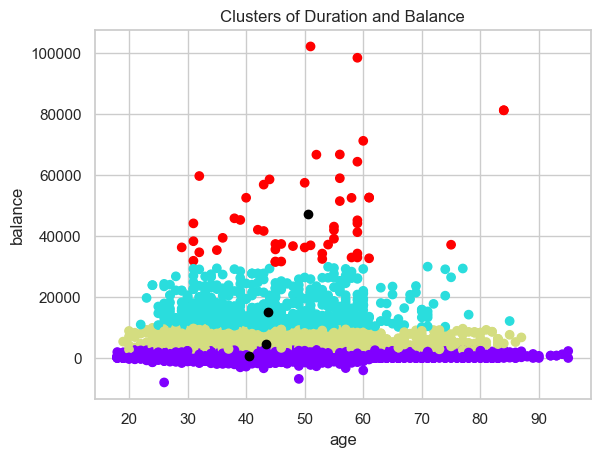

0.7576626903304599

In [77]:
plt.scatter(X5[:,0],X5[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='black')
plt.title('Clusters of Duration and Balance')
plt.xlabel('age')
plt.ylabel('balance')
plt.show()
silhouette_score(X5, kmeans.labels_)

### Customers with higher balance are mostly between 30 - 60 years and their contact duration as seen above is usually less. Score is 76%








# Feature Engineering/ Data Pre-Processing


# Supervised Machine Learning.
- Target is Term Deposits (as deposit)

In [16]:
#Create a copy of the data (Exclude target/Label alongside other columns that was created) this is because
# we dont need categories in our machine Learning algorithms. we shall encode below to make numerical
df6 = df.copy()
df6

age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day month  duration  campaign  pdays  previous poutcome  \
0        unknown    5   may       261         1      1         0  unknown   
1        unknown    5   may       151         1      1         0  unknown   
2        unknown    5   may        76         1      1         0  unknown   
3        unknown    5   may        92         1      1         0  unknown   
4        unknown    5   may       198         1      1         0  unknown   
...          ...  ...   ...       ...       ...    ...       ...      ...   
45206   cellular   17   nov       977         3      1         0  unknown   
45207   cellular   17   nov       456         2      1         0  unknown   
45208   cellular   17   nov      1127         5    184         3  success   
45209  telephone   17   nov       508         4      1         0  unknown   
45210   cellular   17   nov       361         2    188        11    other   

      deposit  month_number      age_bracket  
0          no             5  Old Adult(<=65)  
1          no             5      Adult(<=55)  
2          no             5       Youth(<35)  
3          no             5      Adult(<=55)  
4          no             5       Youth(<35)  
...       ...           ...              ...  
45206     yes            11      Adult(<=55)  
45207     yes            11    Elderly (>65)  
45208     yes            11    Elderly (>65)  
45209      no            11  Old Adult(<=65)  
45210      no            11      Adult(<=55)  

[45211 rows x 19 columns]

In [17]:
# Drop columns not required
X = df6.drop(['age_bracket','default','month_number','pdays','poutcome', 'day', 'marital', 'balance','pdays'], axis=1)
X.head(2)

age         job  education housing loan  contact month  duration  campaign  \
0   58  management   tertiary     yes   no  unknown   may       261         1   
1   44  technician  secondary     yes   no  unknown   may       151         1   

   previous deposit  
0         0      no  
1         0      no

In [18]:
# Drope the deposit column as our target
X = X.drop(['deposit'], axis=1)
X.head(2)

age         job  education housing loan  contact month  duration  campaign  \
0   58  management   tertiary     yes   no  unknown   may       261         1   
1   44  technician  secondary     yes   no  unknown   may       151         1   

   previous  
0         0  
1         0

In [19]:
y = df6['deposit']
y.head(2)

0    no
1    no
Name: deposit, dtype: object

In [20]:
# label Encoding of the Independent Variables
encoder1 = LabelEncoder() # method initialisation

# Looping for columns
for x in X.columns[1:]:
    if(X[x].dtype=='object'):
        X[x] = encoder1.fit_transform(X[x])
    else:
        X[x] = X[x]
X.head()

age  job  education  housing  loan  contact  month  duration  campaign  \
0   58    4          2        1     0        2      8       261         1   
1   44    9          1        1     0        2      8       151         1   
2   33    2          1        1     1        2      8        76         1   
3   47    1          3        1     0        2      8        92         1   
4   33   11          3        0     0        2      8       198         1   

   previous  
0         0  
1         0  
2         0  
3         0  
4         0

In [21]:
# We need to do away with outliers in our dataset such as age, job, balance, day, duration, campaign, previous, month,   

# We need to do away with outliers in our dataset such as age, job, balance, day, month, duration,camaign, previous

## Normalise the date
scaler = MinMaxScaler()

X['Scaled_age'] = scaler.fit_transform(X['age'].values.reshape(-1,1))
X['Scaled_job'] = scaler.fit_transform(X['job'].values.reshape(-1,1))
X['Scaled_month'] = scaler.fit_transform(X['month'].values.reshape(-1,1))
X['Scaled_duration'] = scaler.fit_transform(X['duration'].values.reshape(-1,1))
X['Scaled_campaign'] = scaler.fit_transform(X['campaign'].values.reshape(-1,1))
X['Scaled_previous'] = scaler.fit_transform(X['previous'].values.reshape(-1,1))


X.drop(['age','job','month','duration','campaign','previous'], axis=1, inplace=True)

X.head(3)

education  housing  loan  contact  Scaled_age  Scaled_job  Scaled_month  \
0          2        1     0        2    0.519481    0.363636      0.727273   
1          1        1     0        2    0.337662    0.818182      0.727273   
2          1        1     1        2    0.194805    0.181818      0.727273   

   Scaled_duration  Scaled_campaign  Scaled_previous  
0         0.053070              0.0              0.0  
1         0.030704              0.0              0.0  
2         0.015453              0.0              0.0

In [22]:
# Transform the Target
enconder2 = LabelEncoder()
y = enconder2.fit_transform(y)
y

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
!pip install -U imbalanced-learn

In [23]:
# Our target feature is imbalanced and if we build the model this way, model will be biased. we shall use SMOTE
#SMOTE: Synthetic Minority Over-sampling Technique

from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(36168, 10)
(9043, 10)
(36168,)
(9043,)


In [25]:
#Apply Smote to the Training set
X_train_smote, y_train_smote = smote.fit_resample(X_train.astype('float'),y_train)

In [26]:
# Check before and After for after Smote Application
from collections import Counter
print('before SMOTE :', Counter(y_train))
print('After SMOTE :', Counter(y_train_smote))

before SMOTE : Counter({0: 31970, 1: 4198})
After SMOTE : Counter({0: 31970, 1: 31970})


Classifier: Decision Tree

Classification Report:

              precision    recall  f1-score   support

           0       0.93      0.90      0.91      7952
           1       0.40      0.50      0.45      1091

    accuracy                           0.85      9043
   macro avg       0.67      0.70      0.68      9043
weighted avg       0.87      0.85      0.86      9043



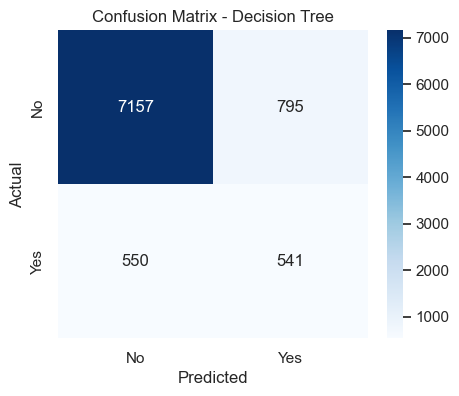





Classifier: K-Nearest Neighbors

Classification Report:

              precision    recall  f1-score   support

           0       0.95      0.84      0.89      7952
           1       0.36      0.69      0.48      1091

    accuracy                           0.82      9043
   macro avg       0.66      0.76      0.68      9043
weighted avg       0.88      0.82      0.84      9043



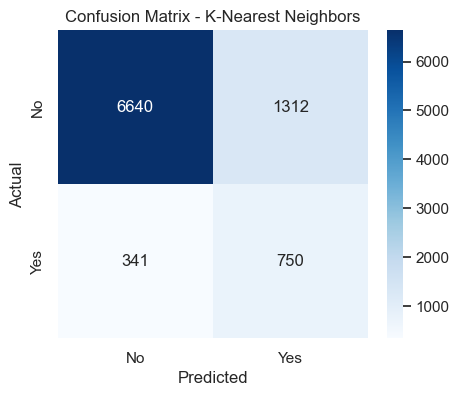





Classifier: Support Vector Machine

Classification Report:

              precision    recall  f1-score   support

           0       0.97      0.79      0.87      7952
           1       0.35      0.82      0.49      1091

    accuracy                           0.79      9043
   macro avg       0.66      0.80      0.68      9043
weighted avg       0.89      0.79      0.82      9043



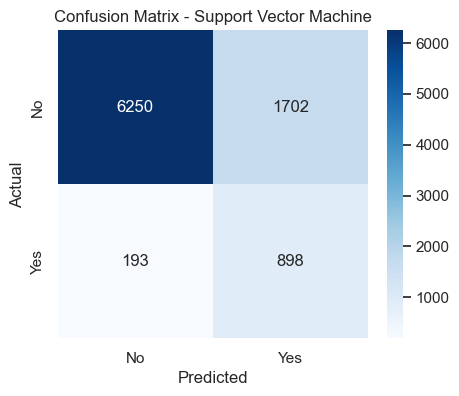





Classifier: Logistic Regression

Classification Report:

              precision    recall  f1-score   support

           0       0.97      0.80      0.88      7952
           1       0.36      0.80      0.49      1091

    accuracy                           0.80      9043
   macro avg       0.66      0.80      0.68      9043
weighted avg       0.89      0.80      0.83      9043



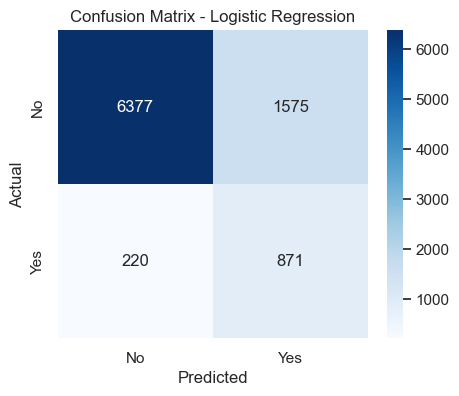





Classifier: Random Forest

Classification Report:

              precision    recall  f1-score   support

           0       0.94      0.92      0.93      7952
           1       0.52      0.60      0.56      1091

    accuracy                           0.88      9043
   macro avg       0.73      0.76      0.74      9043
weighted avg       0.89      0.88      0.89      9043



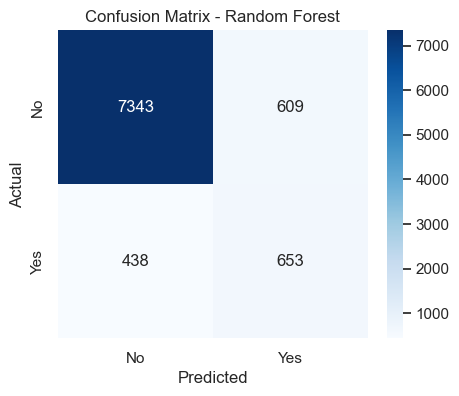





Classifier: Naive Bayes

Classification Report:

              precision    recall  f1-score   support

           0       0.97      0.63      0.76      7952
           1       0.24      0.85      0.37      1091

    accuracy                           0.66      9043
   macro avg       0.60      0.74      0.57      9043
weighted avg       0.88      0.66      0.72      9043



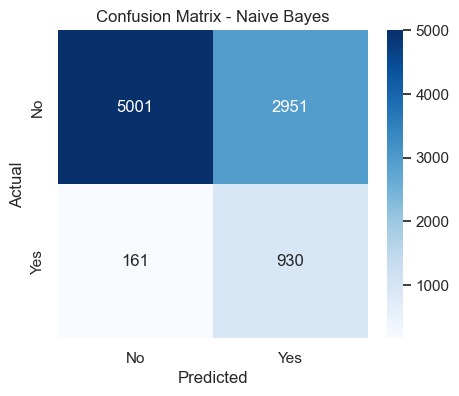





Classifier: Gradient Boosting Machine

Classification Report:

              precision    recall  f1-score   support

           0       0.96      0.89      0.93      7952
           1       0.48      0.72      0.58      1091

    accuracy                           0.87      9043
   macro avg       0.72      0.81      0.75      9043
weighted avg       0.90      0.87      0.88      9043



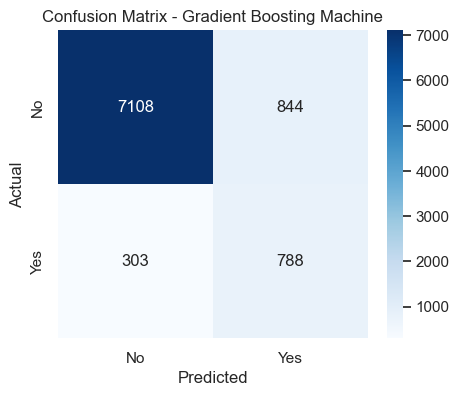





Classifier: XGBoost

Classification Report:

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      7952
           1       0.56      0.51      0.54      1091

    accuracy                           0.89      9043
   macro avg       0.75      0.73      0.74      9043
weighted avg       0.89      0.89      0.89      9043



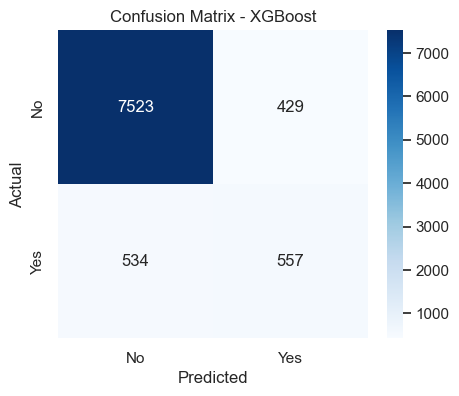

In [27]:
classifiers = [
    (DecisionTreeClassifier(), "Decision Tree"),
    (KNeighborsClassifier(), "K-Nearest Neighbors"),
    (SVC(), "Support Vector Machine"),
    (LogisticRegression(), "Logistic Regression"),
    (RandomForestClassifier(), "Random Forest"),
    (GaussianNB(), "Naive Bayes"),
    (GradientBoostingClassifier(), "Gradient Boosting Machine"),
    (xgb.XGBClassifier(), "XGBoost")
]

# Iterate through the list of classifiers
for classifier, name in classifiers:
    # Train the classifier
    classifier.fit(X_train_smote, y_train_smote)
    
    # Predict on the test set
    y_pred = classifier.predict(X_test)
    
    # Print the classifier's name
    print("Classifier:", name)
    
    # Print the classification report
    print("\nClassification Report:\n")
    print(classification_report(y_test, y_pred))
    
  
    
    # Create Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    # Plotting the confusion matrix with colors
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=['No','Yes'], yticklabels=['No','Yes'])
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
    
    # Add a separator for clarity
    
    print("="*100)
    print('\n\n\n')

In [28]:
# Place the metrics in a DataFrame for e
metrics_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])


for classifier, name in classifiers:
    y_pred = classifier.predict(X_test)  # Replace X_test with your test data
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    metrics_df = metrics_df.append({'Model': name, 'Accuracy': accuracy, 'Precision': precision,
                                    'Recall': recall, 'F1-Score': f1}, ignore_index=True)
    metrics_df = metrics_df.sort_values(by='F1-Score', ascending=False)

display(metrics_df)

Model  Accuracy  Precision    Recall  F1-Score
7                    XGBoost  0.893509   0.889226  0.893509  0.891166
0              Random Forest  0.884220   0.892281  0.884220  0.887798
1  Gradient Boosting Machine  0.873162   0.901655  0.873162  0.883528
2              Decision Tree  0.851266   0.865455  0.851266  0.857610
3        K-Nearest Neighbors  0.817207   0.880282  0.817207  0.839410
4        Logistic Regression  0.801504   0.892990  0.801504  0.830282
5     Support Vector Machine  0.790446   0.894682  0.790446  0.822298
6                Naive Bayes  0.655866   0.880838  0.655866  0.715813

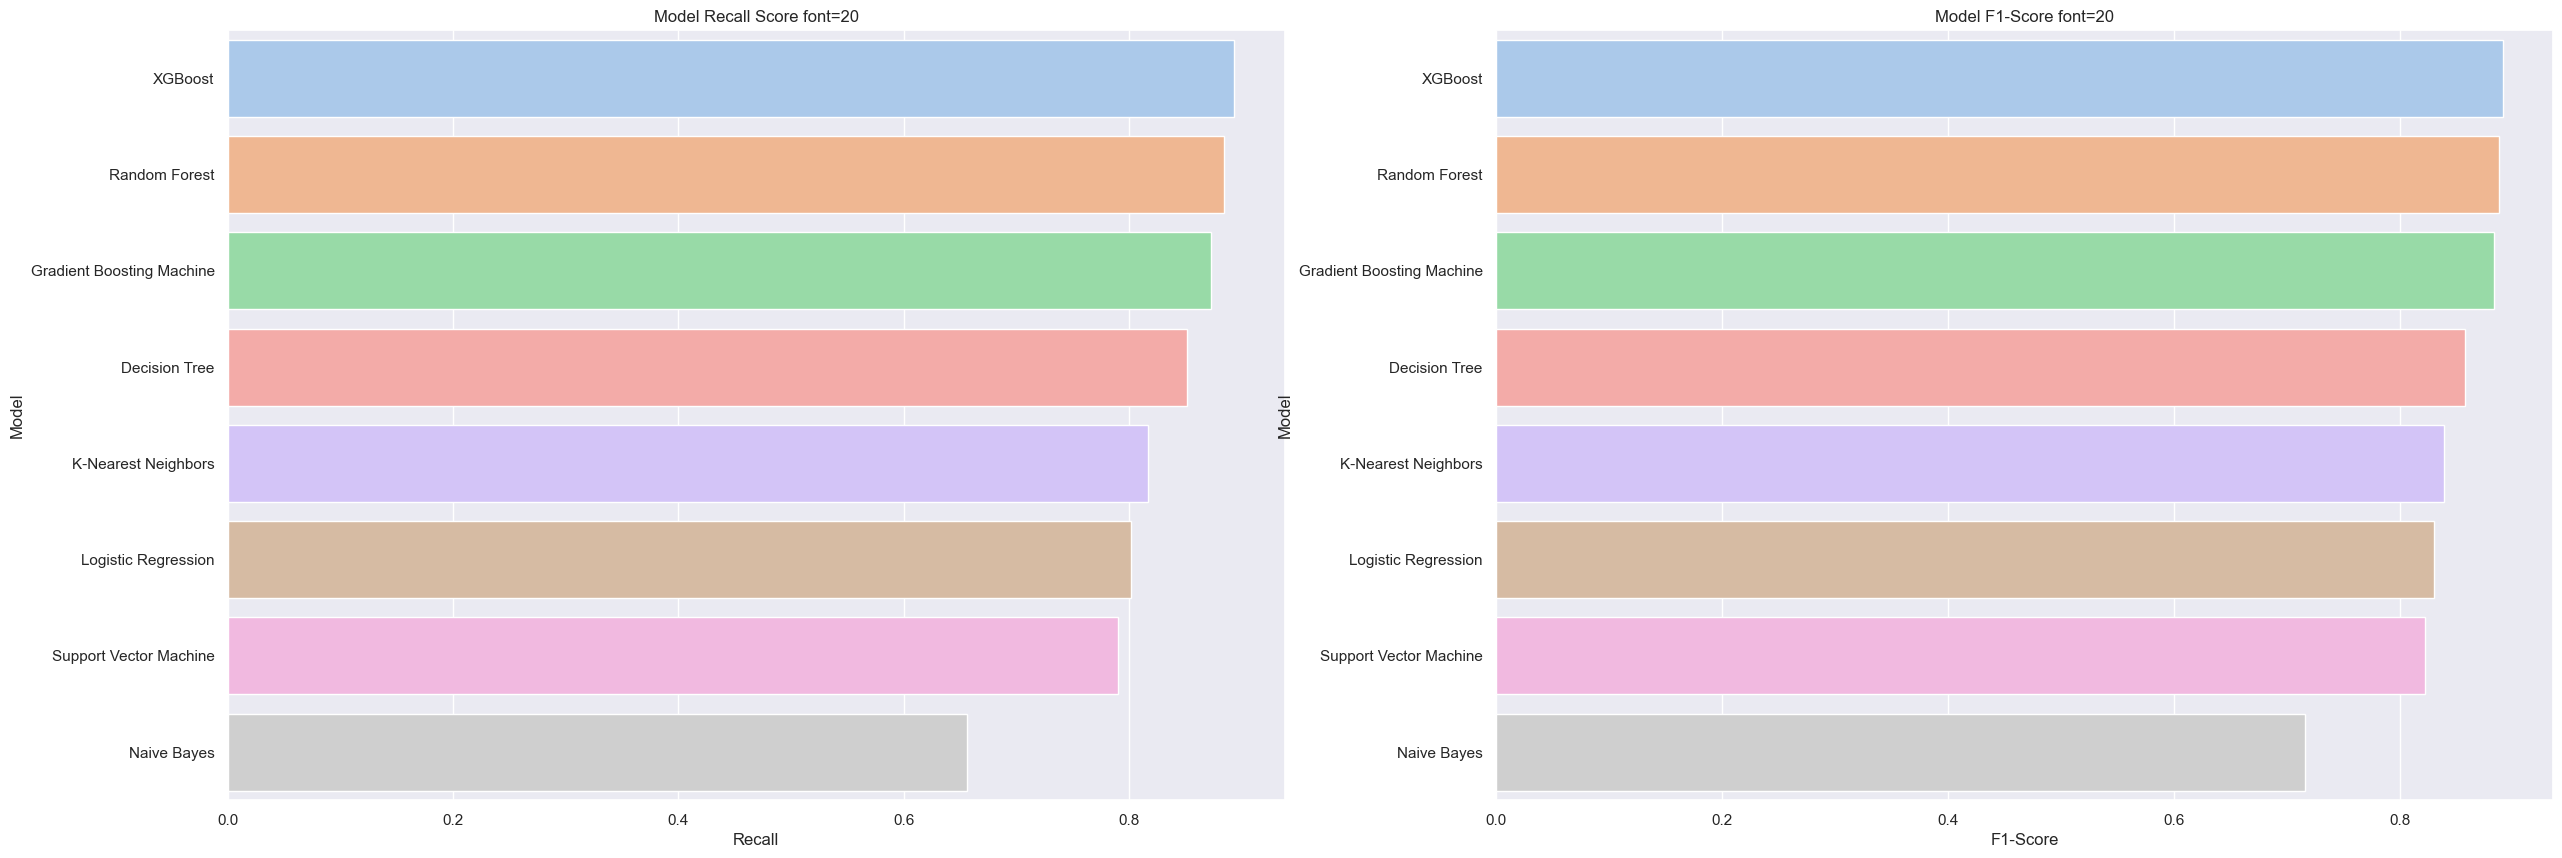

In [40]:
# Visualise the both the Recall and F1-score above
plt.figure(figsize=(30,10))

plt.subplot(1,2,1)
ax = sns.barplot(y='Model', data=metrics_df, x='Recall', palette='pastel')
plt.title('Model Recall Score font=20')

# Defaults by marital
plt.subplot(1,2,2)
ax = sns.barplot(y='Model', data=metrics_df, x='F1-Score', palette='pastel')
plt.title('Model F1-Score font=20');

### In our classification task, our interest is to have the lowest number of false negatives, hence the Recall is most imporant to us. In other words, a false negative means the model fails to identify a positive case when it should have. If this is high, the bank would possibly miss a customer who have the potential and may be interested in term deposit as the machine have predicted it to be false, while its meant to be true. 

### In our classification reports above, XGboost have performed better in this classification with the highest Recall value as 89.4% approx. Going further to the F1 score which is a harmonic mean of the recall & precision, XGboost appears to perform better also.

## Cross Validation

### Perform Cross Validation
- On the Validation of the Model above, K-fold cross-validation is a technique used to assess the performance and generalization capability of a model. 
- It involves splitting the dataset into k equally sized folds and then training and evaluating the model k times, each time using a different fold as the validation set and the remaining folds as the training set. 

- The results are typically averaged to obtain a more robust performance estimate.¶

In [96]:
# Performing Cross Validation
models = [LogisticRegression(),  xgb.XGBClassifier(), DecisionTreeClassifier(), KNeighborsClassifier(),\
          GradientBoostingClassifier(), RandomForestClassifier(), GaussianNB()]

for model in models:
    # Define the cross-validation strategy (10-fold cross-validation)
    cv = KFold(n_splits=10, shuffle=True, random_state=42)
    
 # Perform cross-validation on the SMOTE-applied data and compute metrics
    accuracy_scores = cross_val_score(model, X_train_smote, y_train_smote, cv=cv, scoring='accuracy')
    precision_scores = cross_val_score(model, X_train_smote, y_train_smote, cv=cv, scoring='precision')
    recall_scores = cross_val_score(model, X_train_smote, y_train_smote, cv=cv, scoring='recall')
    f1_scores = cross_val_score(model, X_train_smote, y_train_smote, cv=cv, scoring='f1')
    auc_roc_scores = cross_val_score(model, X_train_smote, y_train_smote, cv=cv, scoring='roc_auc')
    auc_pr_scores = cross_val_score(model, X_train_smote, y_train_smote, cv=cv, scoring='average_precision')
    
    # Compute average performance across all folds
    avg_accuracy = np.mean(accuracy_scores)
    avg_precision = np.mean(precision_scores)
    avg_recall = np.mean(recall_scores)
    avg_f1 = np.mean(f1_scores)
    avg_auc_roc = np.mean(auc_roc_scores)
    avg_auc_pr = np.mean(auc_pr_scores)
    
    # Print the average performance metrics
    print('Model name is:', model)
    print("Average Accuracy:", avg_accuracy)
    print("Average Precision:", avg_precision)
    print("Average Recall:", avg_recall)
    print("Average F1 Score:", avg_f1)
    print("Average AUC-ROC Score:", avg_auc_roc)
    print("Average AUC-PR Score:", avg_auc_pr)

    print('=='*30)

Model name is: LogisticRegression()
Average Accuracy: 0.8082108226462308
Average Precision: 0.8065441982377539
Average Recall: 0.8109772586932589
Average F1 Score: 0.808735859914332
Average AUC-ROC Score: 0.881175676058777
Average AUC-PR Score: 0.8502575994981498
Model name is: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor

In [43]:
data = [
    {
        'Model name': 'LogisticRegression()',
        #'Average Accuracy': 0.8082108226462308,
        'Average Precision': 0.8065441982377539,
        'Average Recall': 0.8109772586932589,
        'Average F1 Score': 0.808735859914332,
        'Average AUC-ROC Score': 0.881175676058777,
        'Average AUC-PR Score': 0.8502575994981498
    },
    {
        'Model name': 'XGBClassifier()',
        #'Average Accuracy': 0.9396152643102909,
        'Average Precision': 0.945548289512459,
        'Average Recall': 0.9329155257358153,
        'Average F1 Score': 0.9391855011984479,
        'Average AUC-ROC Score': 0.988099574789193,
        'Average AUC-PR Score': 0.9893421531729045
    },
    {
        'Model name': 'DecisionTreeClassifier()',
        #'Average Accuracy': 0.9048326556146387,
        'Average Precision': 0.9009969493453729,
        'Average Recall': 0.9097049796944964,
        'Average F1 Score': 0.9055499374556074,
        'Average AUC-ROC Score': 0.9048807750069383,
        'Average AUC-PR Score': 0.8652588067954525
    },
    {
        'Model name': 'KNeighborsClassifier()',
        #'Average Accuracy': 0.9021426337191117,
        'Average Precision': 0.8555642767864269,
        'Average Recall': 0.9676723807819085,
        'Average F1 Score': 0.90815540648405,
        'Average AUC-ROC Score': 0.9519937641000562,
        'Average AUC-PR Score': 0.9188091590414394
    },
    {
        'Model name': 'GradientBoostingClassifier()',
        #'Average Accuracy': 0.9091492023772287,
        'Average Precision': 0.8986554132345264,
        'Average Recall': 0.9223044183603898,
        'Average F1 Score': 0.9103154396565178,
        'Average AUC-ROC Score': 0.9728707692219638,
        'Average AUC-PR Score': 0.9737707015155426
    },
    {
        'Model name': 'RandomForestClassifier()',
        #'Average Accuracy': 0.9379574601188614,
        'Average Precision': 0.924901141817631,
        'Average Recall': 0.9528487507757921,
        'Average F1 Score': 0.938547107838497,
        'Average AUC-ROC Score': 0.9870849623445533,
        'Average AUC-PR Score': 0.9871643635588209
    },
    {
        'Model name': 'GaussianNB()',
        #'Average Accuracy': 0.7479512042539881,
        'Average Precision': 0.6991819288392971,
        'Average Recall': 0.870529266242172,
        'Average F1 Score': 0.7754784871933964,
        'Average AUC-ROC Score': 0.8462501523591156,
        'Average AUC-PR Score': 0.8286619705978288
    }]

In [44]:
# Put in a DataFrame as below
data = pd.DataFrame(data)
data.sort_values(by='Average Recall', ascending=False)

Model name  Average Precision  Average Recall  \
3        KNeighborsClassifier()           0.855564        0.967672   
5      RandomForestClassifier()           0.924901        0.952849   
1               XGBClassifier()           0.945548        0.932916   
4  GradientBoostingClassifier()           0.898655        0.922304   
2      DecisionTreeClassifier()           0.900997        0.909705   
6                  GaussianNB()           0.699182        0.870529   
0          LogisticRegression()           0.806544        0.810977   

   Average F1 Score  Average AUC-ROC Score  Average AUC-PR Score  
3          0.908155               0.951994              0.918809  
5          0.938547               0.987085              0.987164  
1          0.939186               0.988100              0.989342  
4          0.910315               0.972871              0.973771  
2          0.905550               0.904881              0.865259  
6          0.775478               0.846250              0.828662  
0          0.808736               0.881176              0.850258

### Achieving the highest recall was the primary objective, then KNeighborsClassifier() should indeed be considered as a strong candidate for deployment. It demonstrates a high ability to correctly identify positive instances (term deposits) out of all the positive instances in the dataset, resulting in a lower number of false negatives.

### However, also considering the average AUC-PR score, Randomforest and XGBclassifiers are very strong contenders. AUC-PR score provides an aggregated measure of the model's performance across multiple classes.

### the Average AUC-PR score considers precision and recall, which are more informative measures in imbalanced settings.

### In summary, the Average AUC-PR score as a metric that quantifies the performance of a binary classification model in handling class imbalance by measuring the model's ability to rank positive instances higher than negative instances across various classification thresholds; we shall then propose the XGBclassifier or the ramdomforest_classifier as the best in this classification task and therefore either or should be deployed.

### Conclusion and Recommendations

- The Purpose of this project was to segment customers for campaign targets, identify customer types with the highest defaults and build a machine learning model to predict term deposit in nexus bank.

- We have previously established our insights from EDA and identified the customers that should be targeted for campaigns

- We further segmented the customers by defining their behavior and insights from where a guide to the marketing team to be specific in their campaigns

- We propose deployment of our machine learning models bases the summary above.


In [48]:
# we shall check our feature importance
importances = classifier.feature_importances_

feature_names = X_train_smote.columns  # Replace with the actual feature names or column labels
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)

           Feature  Importance
9  Scaled_previous    0.199175
7  Scaled_duration    0.189305
1          housing    0.182275
8  Scaled_campaign    0.159013
3          contact    0.098385
6     Scaled_month    0.067409
4       Scaled_age    0.034296
2             loan    0.030893
5       Scaled_job    0.024112
0        education    0.015137


In [49]:
kkk = pd.DataFrame(importance_df)
kkk

Feature  Importance
9  Scaled_previous    0.199175
7  Scaled_duration    0.189305
1          housing    0.182275
8  Scaled_campaign    0.159013
3          contact    0.098385
6     Scaled_month    0.067409
4       Scaled_age    0.034296
2             loan    0.030893
5       Scaled_job    0.024112
0        education    0.015137

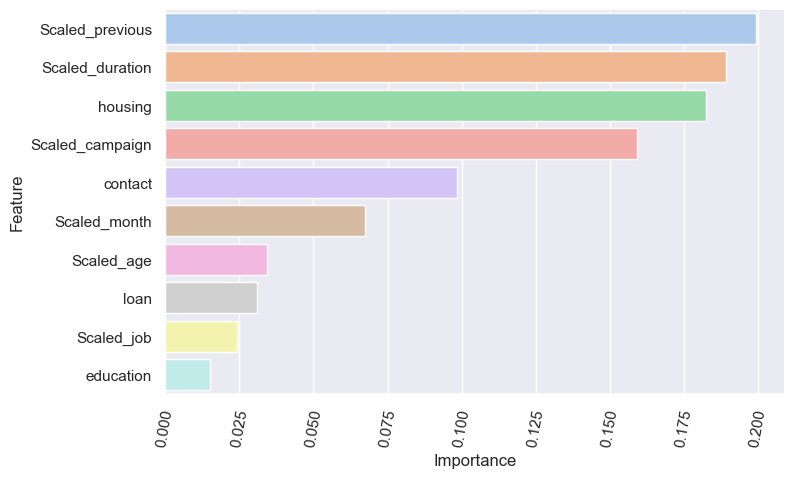

In [50]:
plt.figure(figsize=(8,5))
sns.barplot(data=kkk, y='Feature', x='Importance', palette='pastel')
plt.xticks(rotation=80)
plt.show();